<a href="https://colab.research.google.com/github/IvyAldama/EstructurasDeDatos/blob/main/Modelos_de_aprendizaje_no_supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5. Modelos de aprendizaje no supervisado
## 5.1 Agrupamiento

Ya aprendiste sobre el machine learning supervisado, es decir, cuando se solicita algo en particular al modelo, se descifra el significado de los datos y se establecen las variables. Sin embargo, ¿Qué pasa cuando esto se desconoce?

Por ejemplo, si deseas hacer un modelo para predecir la mejor talla de ropa para una persona a partir de una foto, la operación puede complicarse con un modelo supervisado, porque existen cuerpos diversos con diferentes alturas, anchos, tipos de piernas, torsos, longitud de brazos, etc. Dada la multiplicidad de variables de características y de etiquetas, no es posible controlarlo fácilmente.

Otro ejemplo de esto son las redes sociales. ¿Cómo sabe TikTok que el contenido que publica un usuario es indebido, cuando debe buscar en todo el universo de videos que diariamente se comparten, frame por frame y pixel por pixel? ¿Sabías que TikTok no permite subir videos que muestren un código QR?

Los ingenieros de IA de la empresa entrenaron a los modelos para detectar este tipo de contenidos etiquetando videos similares ya identificados. Sin embargo, los usuarios encuentran formas de vulnerar esta restricción. Entonces, ¿cómo sigue aprendiendo el modelo? La respuesta es: mediante aprendizaje no supervisado, pues de esta manera no debe esperar una etiqueta de por medio, simplemente agrupa los videos conforme a sus características.

Lejos de lo que pueda pensarse, los aprendizajes supervisado y no supervisado no son contrarios, por el contrario, pueden ser buenos complementos.

Ahora bien, uno de los métodos iniciales del aprendizaje no supervisado es el clustering.

### ¿Qué es el clustering?
Un niño aprende a diferenciar animales. Cuando es pequeño, no tiene idea de qué es esa forma peluda, que mueve la cola, con orejas paradas y jadeante que tiene frente a sí. Entonces, cuando un adulto señala que es un perro, el niño asocia las características con el nombre. Independientemente de la raza o talla identifica que otro animal con las mismas características también puede ser perro. Cuando se encuentre un ser con astas, más grande, que come pasto y no ladra, notará que este no es un perro y ubica dicho animal en otra categoría, aunque posteriormente descubra la o noción de "venado".

De una forma similar, la clusterización agrupa elementos en grupos o clústeres significativos. Por lo regular, hacer esto revela patrones en los datos que representan un primer paso útil en el proceso de Machine Learning. Entonces, el clustering es una tarea de aprendizaje automático no supervisado.

Un ejemplo simple de la vida real del principio de clustering es la recopilación de datos sobre el tamaño del hogar y sus ingresos para crear grupos de usuarios, como familias pequeñas que gastan mucho, familias pequeñas que gastan poco, familias grandes que gastan mucho y familias grandes que gastan poco.

El proceso estándar de clustering se divide en los siguientes pasos:

Extracción y selección de características: extraer y seleccionar las características más representativas del conjunto de datos original.
Diseño del algoritmo de agrupamiento: diseñar el algoritmo de agrupamiento de acuerdo con las características del problema.
Evaluación de resultados: evaluar el resultado de la agrupación y juzgar la validez del algoritmo.
Explicación del resultado: ofrecer una explicación práctica del resultado del clustering.
Luego de entender qué es el clustering, es momento de abordar la parte práctica de esta semana.

## Clustering jerárquico
El clustering jerárquico, también conocido como análisis de conglomerados jerárquicos, es un algoritmo que agrupa objetos similares en grupos llamados conglomerados. El resultado es un conjunto de clústeres, donde cada uno es distinto de los demás y los objetos dentro son muy similares entre sí.

Esta aproximación es adecuada para datos jerárquicos y crea un árbol de clústeres.

Ejemplo:

Para comenzar, descarga este dataset con datos de un departamento de marketing y cárgalo en un Data Frame: https://drive.google.com/file/d/17rz2cPK0FxW5I9HfgCSjkA8IiUi3YAaU/view?usp=sharing



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/marketing-data.csv')
df.head()

df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

Aquí, se aprecia que el marketing ha generado un CustomerID, mediante el cual reunió Genre, Age, Annual Income+(en miles de dólares) y un Spending Score de 1 a 100 para cada uno de los 200 clientes.

Cuando se solicitó una aclaración al departamento de marketing, estos señalaron que los valores en la columna Spending Score representan la frecuencia con que una persona gasta dinero en un centro comercial en una escala de 1 a 100.

En otras palabras, si un cliente tiene una puntuación de 0 significa que nunca gasta dinero; en cambio, si la puntuación es 100, entonces es quien gasta más.

Los hábitos de gasto de los usuarios pueden inspeccionarse fácilmente por medio de un histograma.


<Axes: >

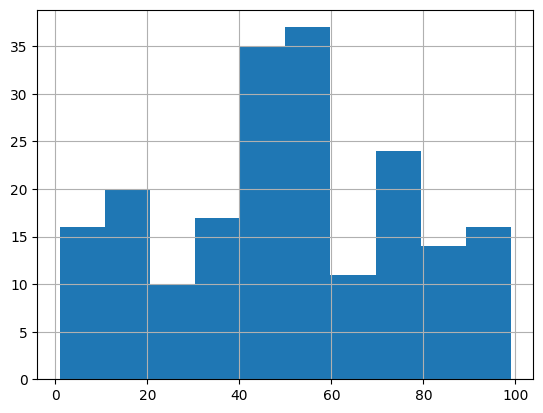

In [ ]:
df['Spending Score (1-100)'].hist()

Al observar el histograma,se aprecia que más de 35 clientes tienen puntajes entre 40 y 60, asimismo, que poco menos de 25 tienen puntajes entre 70 y 80. Por lo anterior, la mayoría de los clientes son gastadores equilibrados, seguidos de gastadores moderados a altos. También se muestra una línea después de 0, a la izquierda de la distribución, y otra línea antes de 100, a la derecha de la distribución. Estos espacios en blanco probablemente significan que los datos no contiene personas que no gastan, que tendrían una puntuación de 0, y que tampoco hay personas que gastan mucho con una puntuación de 100.

Para verificar si todas estás afirmaciones son ciertas, se analizan los valores mínimos y máximos de la distribución. Estos se encuentran con la función describe().

Por otro lado, con transpose() la tabla se cambia de lugar para obtener los datos según la preferencia de visualización.

In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


Esto confirma las hipótesis anteriores. También se observa un comportamiento similar para la columna Annual Income; para demostrarlo, se puede generar un histograma apuntando a esta columna.

<Axes: >

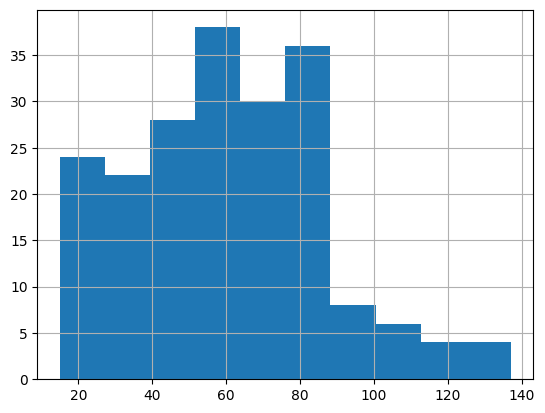

In [ ]:
df['Annual Income (k$)'].hist()



En el histograma se advierte que más de 35 clientes se concentran cerca del número 60. Esto resulta de suma utilidad para agrupar a los clientes por medio de Annual Income, aunque todavía se necesita más información.

A continuación, se muestra nuevamente un fragmento de los datos:


In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Con esta muestra se sabe que aparecen dos géneros. Si se desea usar esta función en el modelo, Male podría transformarse a  0  y Female en  1 . También es importante comprobar la proporción entre géneros, para corroborar que están equilibrados. Esto se ejecuta con el método value_counts() para mostrar el porcentaje entre Male y Female:


In [ ]:
df['Genre'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Genre, dtype: float64

En el conjunto de datos existe un 56% de mujeres y 44% de hombres. La diferencia entre ellos es solo de 16%. Pese a no tener una distribución 50/50, las cifras están lo suficientemente equilibradas, así que no suponen un problema.

Hasta ahora, todas las características se exploraron con facilidad, excepto por Age. Para Age, el rasgo se divide en bins para segmentar a los clientes en función de sus grupos de edad. Al hacerlo, las categorías de edad en un número deben transformarse antes de agregarlas al modelo. De esa forma, en lugar de usar la categoría 15-20 años, se contabiliza el número de clientes en dicha categoría y esto se convertiría en un número en una nueva columna llamada "15-20".

In [ ]:
# Definimos los intervalos en los que cortaremos los datos
intervalos = [15, 20, 30, 40, 50, 60, 70]

# Definimos las columnas a cortar
columnas = df['Age']

# Se cortan los datos con la función cut()
df['Grupos de Edad'] = pd.cut(x=columnas, bins=intervalos)

df['Grupos de Edad']

0      (15, 20]
1      (20, 30]
2      (15, 20]
3      (20, 30]
4      (30, 40]
         ...   
195    (30, 40]
196    (40, 50]
197    (30, 40]
198    (30, 40]
199    (20, 30]
Name: Grupos de Edad, Length: 200, dtype: category
Categories (6, interval[int64, right]): [(15, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] <
                                         (60, 70]]

A continuación, se determinará el número de clientes por categoría:

In [ ]:
df.groupby('Grupos de Edad')['Grupos de Edad'].count()

Grupos de Edad
(15, 20]    17
(20, 30]    45
(30, 40]    60
(40, 50]    38
(50, 60]    23
(60, 70]    17
Name: Grupos de Edad, dtype: int64

Es fácil detectar que la mayoría de los clientes tiene entre 30 y 40 años, seguidos por los clientes entre 20 y 30 y en tercer lugar los clientes entre 40 y 50. Esta también es una buena información para el departamento de Marketing.

Por el momento, se tienen dos variables categóricas, Age y Genre, que requieren una transformación en números para usarlas en el modelo. Para ello, se recurre al método get_dummies(), que crea una nueva columna para cada intervalo y género; luego, llena sus valores con 0 y 1. Este procedimiento se denomina one-hot

In [ ]:
df_oh = pd.get_dummies(df)
df_oh

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male,"Grupos de Edad_(15, 20]","Grupos de Edad_(20, 30]","Grupos de Edad_(30, 40]","Grupos de Edad_(40, 50]","Grupos de Edad_(50, 60]","Grupos de Edad_(60, 70]"
0,1,19,15,39,0,1,1,0,0,0,0,0
1,2,21,15,81,0,1,0,1,0,0,0,0
2,3,20,16,6,1,0,1,0,0,0,0,0
3,4,23,16,77,1,0,0,1,0,0,0,0
4,5,31,17,40,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,35,120,79,1,0,0,0,1,0,0,0
196,197,45,126,28,1,0,0,0,0,1,0,0
197,198,32,126,74,0,1,0,0,1,0,0,0
198,199,32,137,18,0,1,0,0,1,0,0,0


La columna Grupos de Edad se dividió en 6 nuevas columnas, una para cada intervalo, como Grupos de Edad_(15, 20], Grupos de Edad_(20, 30], etc.

De la misma manera, en Genre, cuando el cliente tiene 18 años, el valor de Grupos de Edad_(15, 20] es 1 y el valor de todas las demás es 0.

Para las necesidades de agrupamiento, la método one-hot parece funcionar. Además, se pueden graficar los datos para analizar si realmente hay grupos distintos para agrupar.

El dataset tiene 11 columnas. Para visualizarlas, existen algunas alternativas.

Trazar el dataset en 10 dimensiones (lo cual supone un alto grado de complejidad). Se determina este número porque Customer_ID no se considera como columna.

Trazar las características numéricas iniciales.

Transformar las 10 características en 2, pues así se reducen las dimensiones.

Dado que trazar 10 dimensiones es poco viable, en este caso se optará por el segundo enfoque, es decir, por trazar las características iniciales.

Para el clustering inicial es posible elegir dos características. Una forma de ver todos los pares de datos combinados es con ayuda del método de Seaborn pairplot()


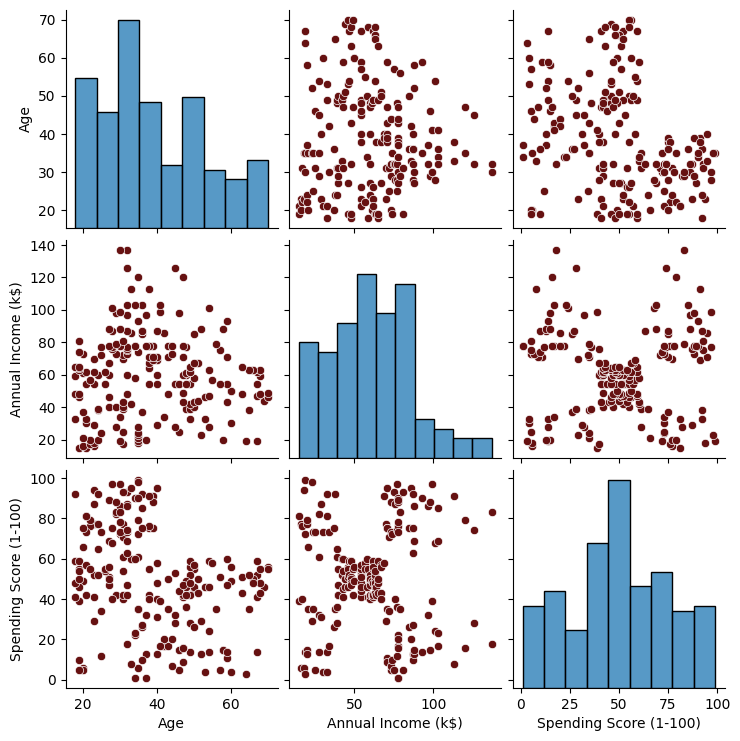

In [ ]:
# Aquí quitamos la columna CustomerID de los datos
df_data = df.drop('CustomerID', axis=1)

sns.pairplot(df_data, plot_kws={"color": '#661111'})

Es posible detectar que los diagramas de dispersión parecen tener grupos de datos. Uno que puede utilizarse es el diagrama de dispersión que combina Annual Income y Spending Score, es decir, el segundo de la tercera fila de gráficas, pues parece que los datos se agrupan en cinco clústeres.

Es importante considerar solamente dos características para agrupar a los clientes. Cualquier otra información sobre ellos no forma parte del proceso. Esto le da sentido al análisis, pues si se averigua cuánto gana y gasta un cliente, entonces resultará más fácil hallar las similitudes requeridas.

Ahora sigue un paso necesario en ejercicios de clustering y es el Análisis de Componentes Principales. Por ahora lo trataremos de manera sencilla y después en este módulo profundizaremos en ello.

### Análisis de componentes principales (PCA)

Al parecer, este enfoque brinda un buen resultado. Sin embargo, podría recurrir al tercer método antes mencionado. Este puede ser útil cuando no es posible graficar los datos porque tienen demasiadas dimensiones o cuando no existan concentraciones de datos o separación clara en grupos. En estos casos, se recomienda reducir las dimensiones de los datos con un método llamado Principal Component Analysis (PCA) o Análisis de componentes principales.

Esto reducirá las dimensiones de los datos mientras preserva la mayor cantidad de información posible.

Para cada par de características, PCA analiza si los valores mayores de ambas variables corresponden entre sí y repite la operación con los valores menores. Entonces, calcula la variación de los valores de las características mediante un procedimiento denominado covarianza. Posteriormente, esos resultados se organizan en una matriz de covarianza.

Antes de aplicar PCA, se selecciona entre la columna Age o las columna Grupos de Edad en los datos previamente codificados con on-hot. Dado que ambas columnas representan la misma información, introducirla dos veces afecta la varianza. Por otra parte, si se eligen las columnas Grupos de Edad, simplemente se elige la columna Age con la función drop() de Pandas.


In [ ]:
df_oh = df_oh.drop(['Age'], axis=1)
df_oh.shape

(200, 11)

Para calcular la varianza de cada dimensión se usa PCA de Scikit-Learn. Se calcula la varianza explicada de cada dimensión, dada por explained_variance_ratio_ y enseguida se ejecuta la suma acumulada con cumsum().

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3) # Establecemos el PCA de todos los componentes
p=pca.fit_transform(df_oh) # Lo aplicamos a nuestro dataset codificado
pca.explained_variance_ratio_.cumsum() # Calculamos las varianzas acumuladas explicadas

p.shape

(200, 3)

Ejecutando el fragmento de código anterior apreciamos que la primera dimensión explica 50% de los datos y, al combinarse con la segunda, ambas arrojan un resultado de 99%, es decir, las 2 primeras dimensiones cubren los datos casi por completo. Entonces, al aplicar un PCA con 2 componentes, se obtienen los elementos necesarios para graficar:

<Axes: >

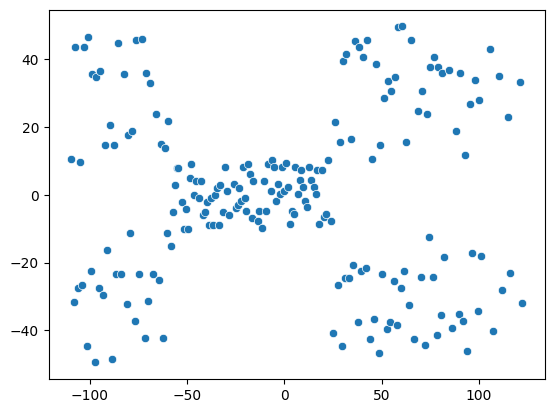

In [ ]:
pca = PCA(n_components=10) # Establecemos el PCA de 2 componentes
pcs = pca.fit_transform(df_oh) # Lo aplicamos a nuestro dataset codificado

# Gráficamos
pc1_values = pcs[:,0]
pc2_values = pcs[:,1]
sns.scatterplot(x=pc1_values, y=pc2_values)

(<Axes: ylabel='Frequency'>, <Axes: ylabel='Density'>)

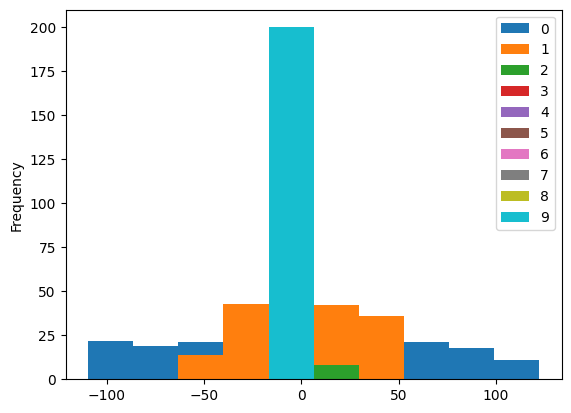

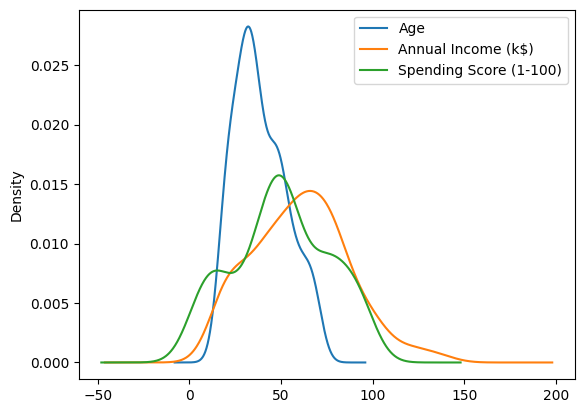

In [ ]:
dfpcs=pd.DataFrame(pcs)
dfpcs.plot(kind='hist'), df.iloc[:,1:].plot(kind='kde')


La gráfica de datos después de PCA es muy similar a aquella que usa solo dos columnas de datos sin PCA.

Dendrogramas

Estos últimos gráficos identifican que existen 5 clústeres en los dados, pero también es posible visualizar las relaciones entre puntos para determinar la cantidad de clústeres mediante la creación de un dendrograma

El dendrograma es el resultado de la vinculación de puntos en un conjunto de datos. Es una representación visual del proceso de clustering jerárquico.

Un Hierarchical Clustering Algorithm (HCA) o algoritmo de clustering jerárquico comienza a vincular los puntos y encontrar agrupamientos.

Primero, se dividen los puntos en 2 grandes grupos y luego cada uno se subdivide en 2 más pequeños formando así cuatro grupos.Esto se conoce como método divisivo y con enfoque de arriba hacia abajo.

Por otro lado, se puede hacer lo opuesto; es decir, mirar todos los puntos de datos, encontrar los 2 más cercanos entre sí, vincularlos y hallar otros puntos suficientemente cerca de los anteriores para seguir construyendo grupos. A esto se le denomina método aglomerativo de abajo hacia arriba.

Pasos para realizar un AHC

Para realizar un algoritmo de Agglomerative Hierarchical Clustering (AHC) se sigue una serie de pasos:

1. Para iniciar, trata cada punto de datos como un grupo. Así, la cantidad de grupos al principio será  𝐾 , mientras que  𝐾  es un número entero que representa la cantidad de puntos de datos.
2. Forma un grupo uniendo los dos puntos de datos más cercanos que arrojen como resultado grupos  𝐾−1 .
3. Forma más grupos uniendo los dos grupos más cercanos que dan como resultado grupos  𝐾−2 .
4. Repite los tres pasos anteriores hasta formar un grupo grande.

Para comenzar el AHC se grafica un dendrograma de los datos de los clientes para visualizar las relaciones jerárquicas.


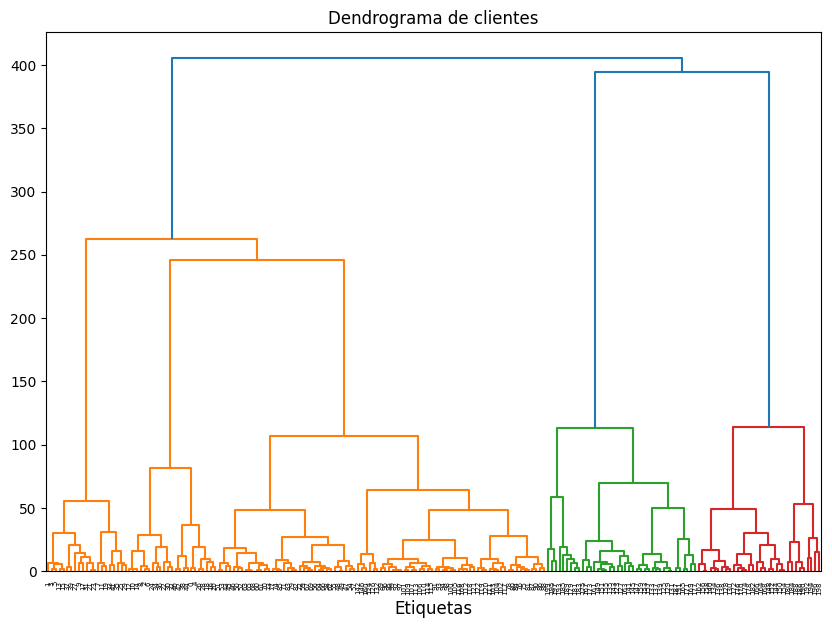

In [ ]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Dendrograma de clientes")


# Seleccionamos Annual Income y Spending Scores como indices
selected_data = df_oh.iloc[:, 1:3]
clusters = shc.linkage(selected_data,
            method='ward',
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.xlabel("Etiquetas", fontsize=12)
plt.show()

En el script anterior, se generaron los grupos y subgrupos con los puntos, se definió la vinculación entre puntos (aplicando el método ward) y cómo medir la distancia entre puntos (usando la métrica euclidean).

Con el gráfico del dendrograma, es posible visualizar los procesos descritos de DHC y AHC. Para el enfoque de arriba hacia abajo, se inicia desde la parte superior del dendrograma; en caso contrario, para visualizar el enfoque de abajo hacia arriba se comienza en la parte inferior.

### Métodos de vinculación

Existen diversos métodos de vinculación y al comprender mejor su funcionamiento, será posible elegir el adecuado para las necesidades del modelo. Además, cada uno arrojará resultados diferentes cuando se apliquen. No hay una regla fija en el análisis de clústeres; no obstante, si es posible estudia primero la naturaleza del problema, para seleccionar aquel que se ajusta mejor, prueba diferentes métodos e inspecciona los resultados.

Algunos métodos son:

**Vinculación simple**: también conocido como vecino más cercano o Nearest Neighbor (NN). La distancia entre clusteres se define por la distancia entre sus miembros más cercanos.


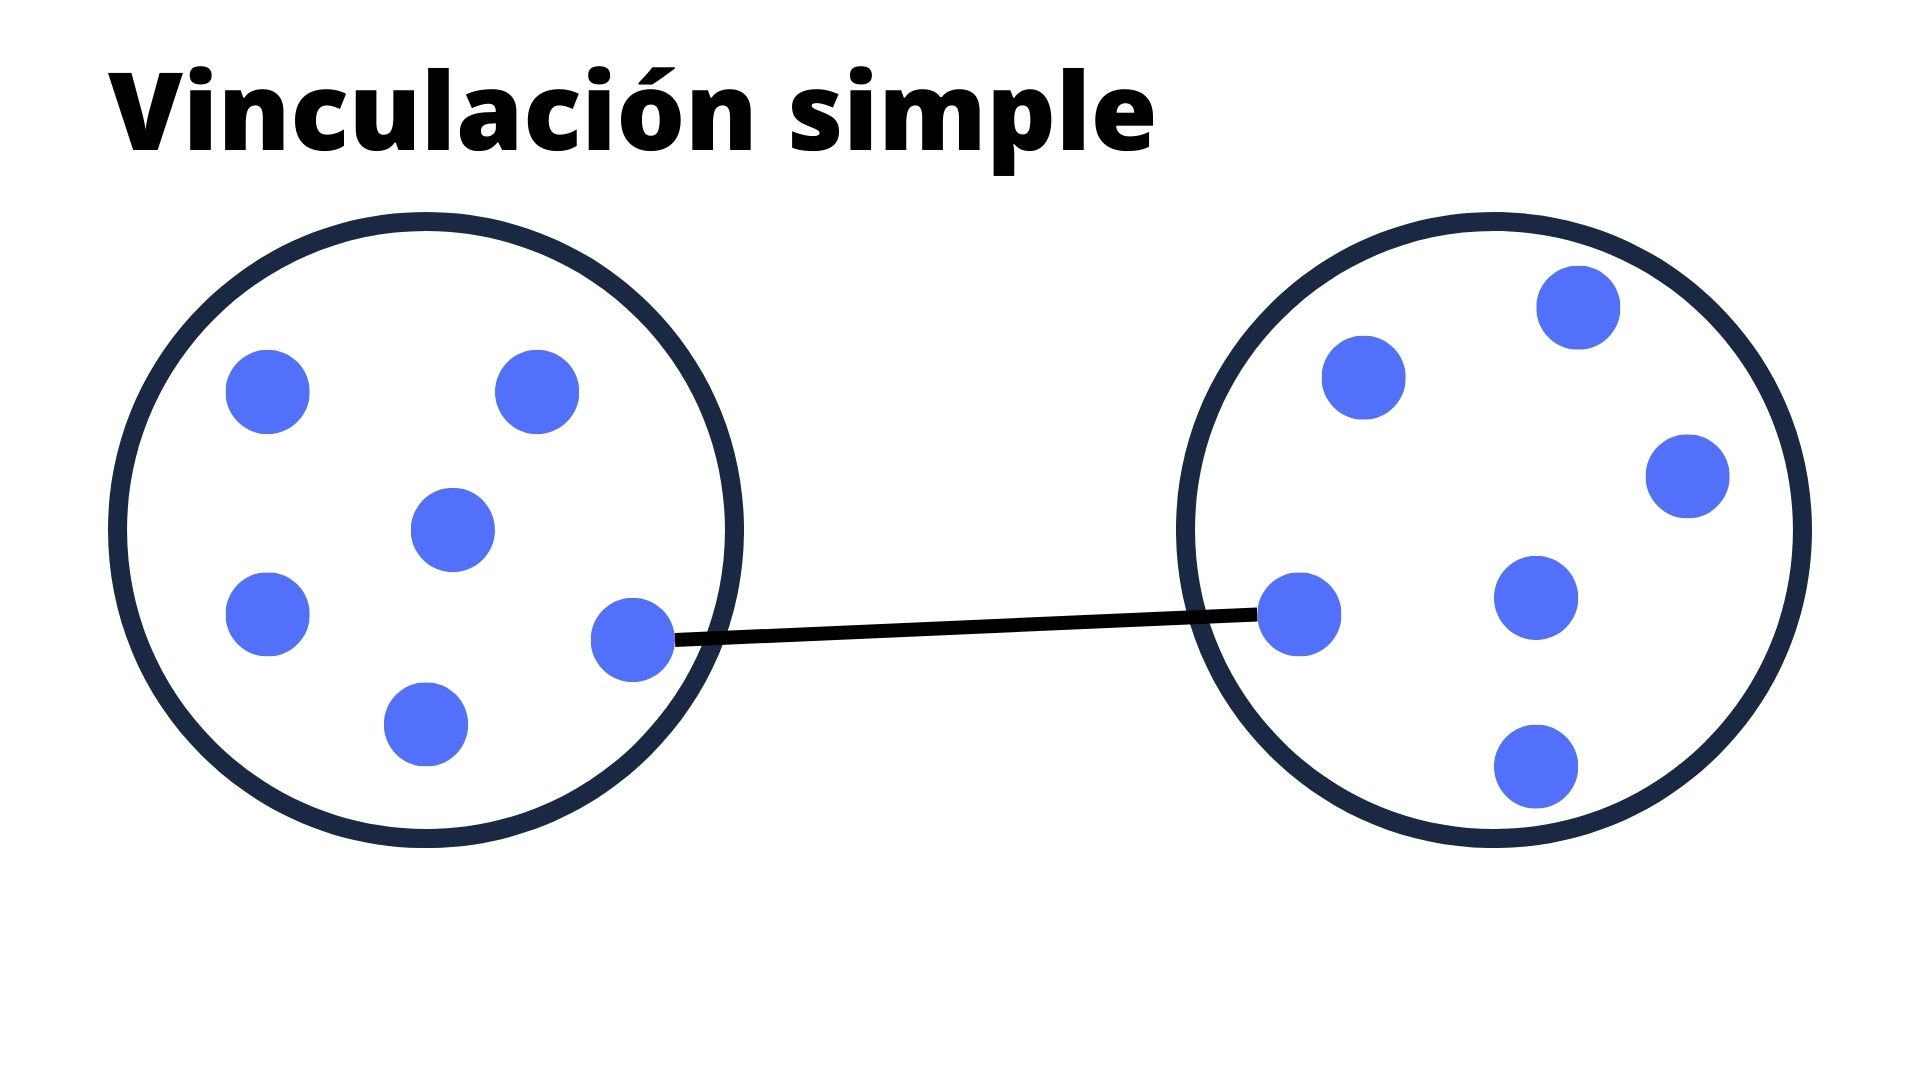

**Vinculación completa:** también conocido como Vecino más lejano o Furthest Neighbor (FN). La distancia entre grupos se define por la distancia entre sus miembros más lejanos. Este método es más costoso para la computadora, es decir, demanda más recursos.

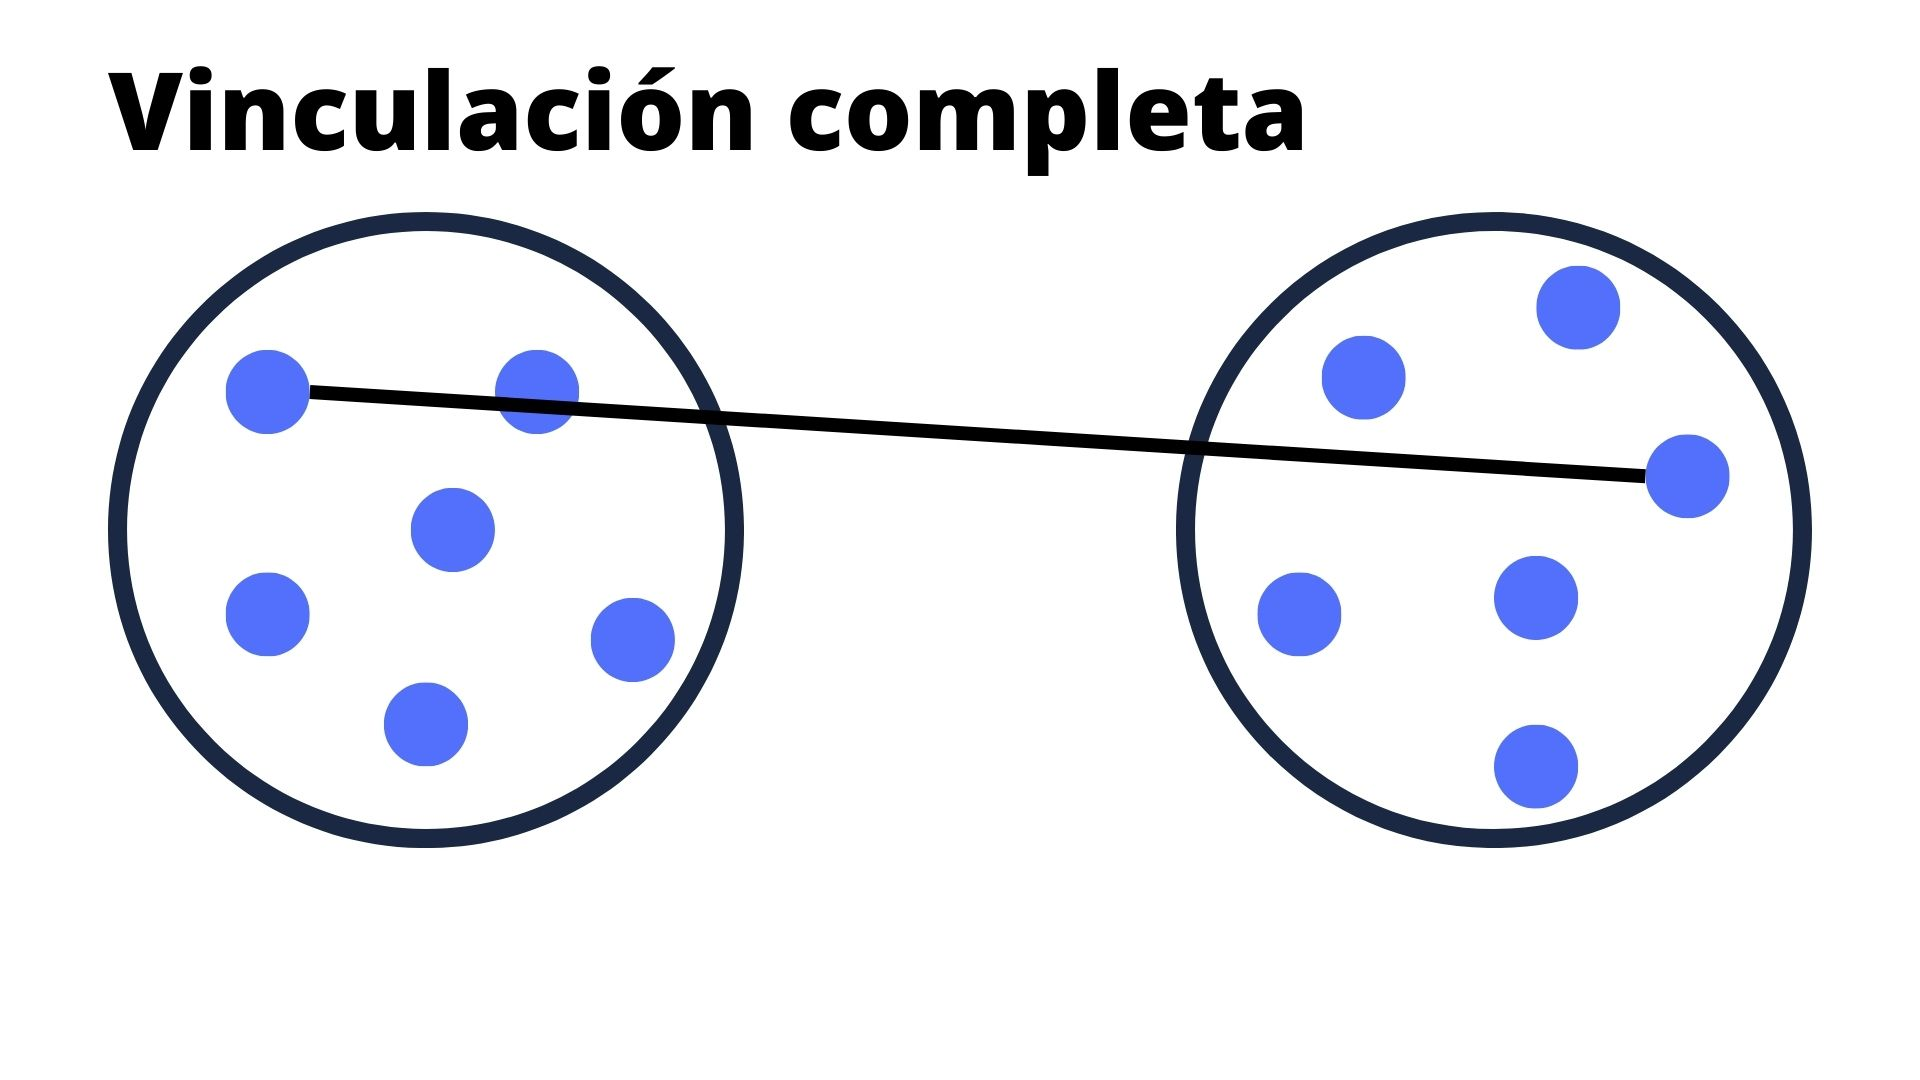

**Vinculación promedio**: también conocido como UPGMA (Weighted Pair Group Method with Arithmetic mean). El porcentaje del número de puntos de cada clúster se calcula con respecto al número de puntos de los dos clústeres si estuvieran fusionados.

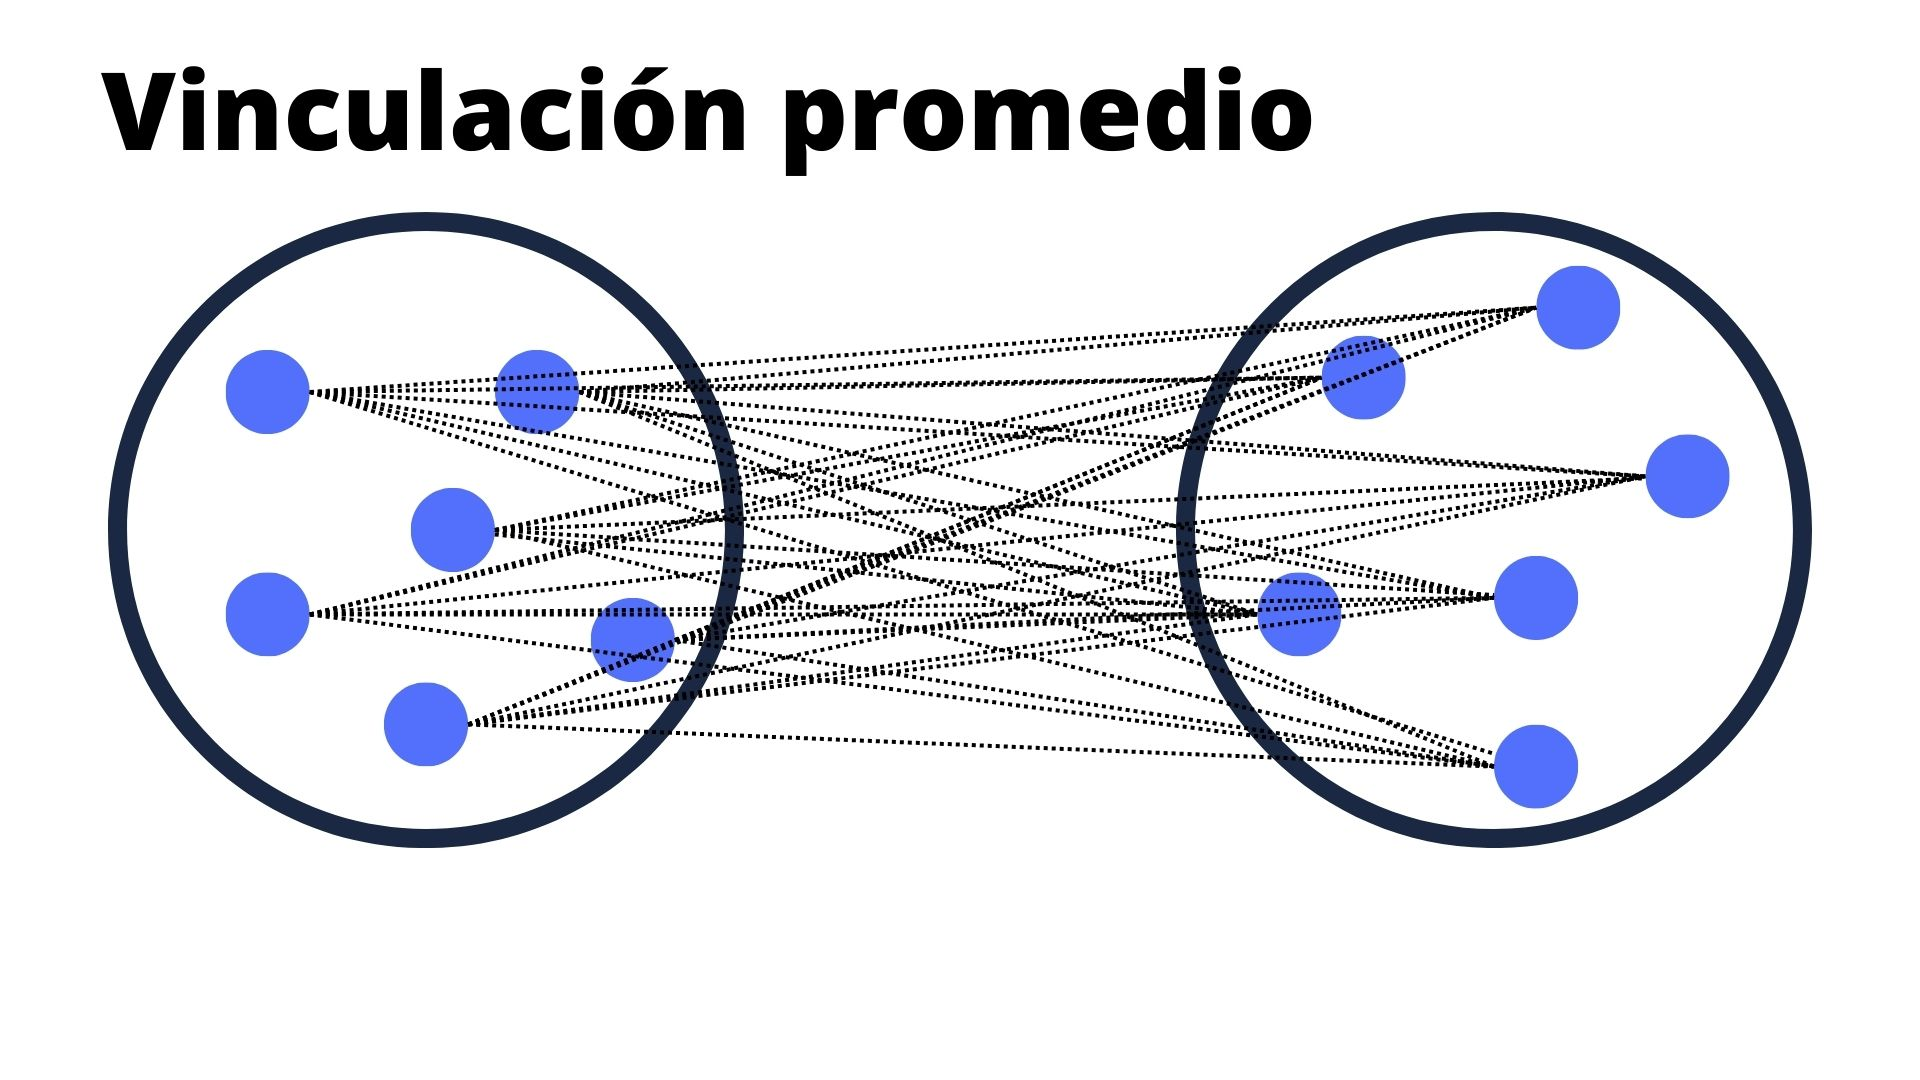

**Vinculación centroide**: también conocido como UPGMC (Unweighted Pair Group Method using Centroids). Se calcula un punto definido por la media de todos los puntos (centroide) para cada grupo y la distancia es la existente entre sus respectivos centroides.

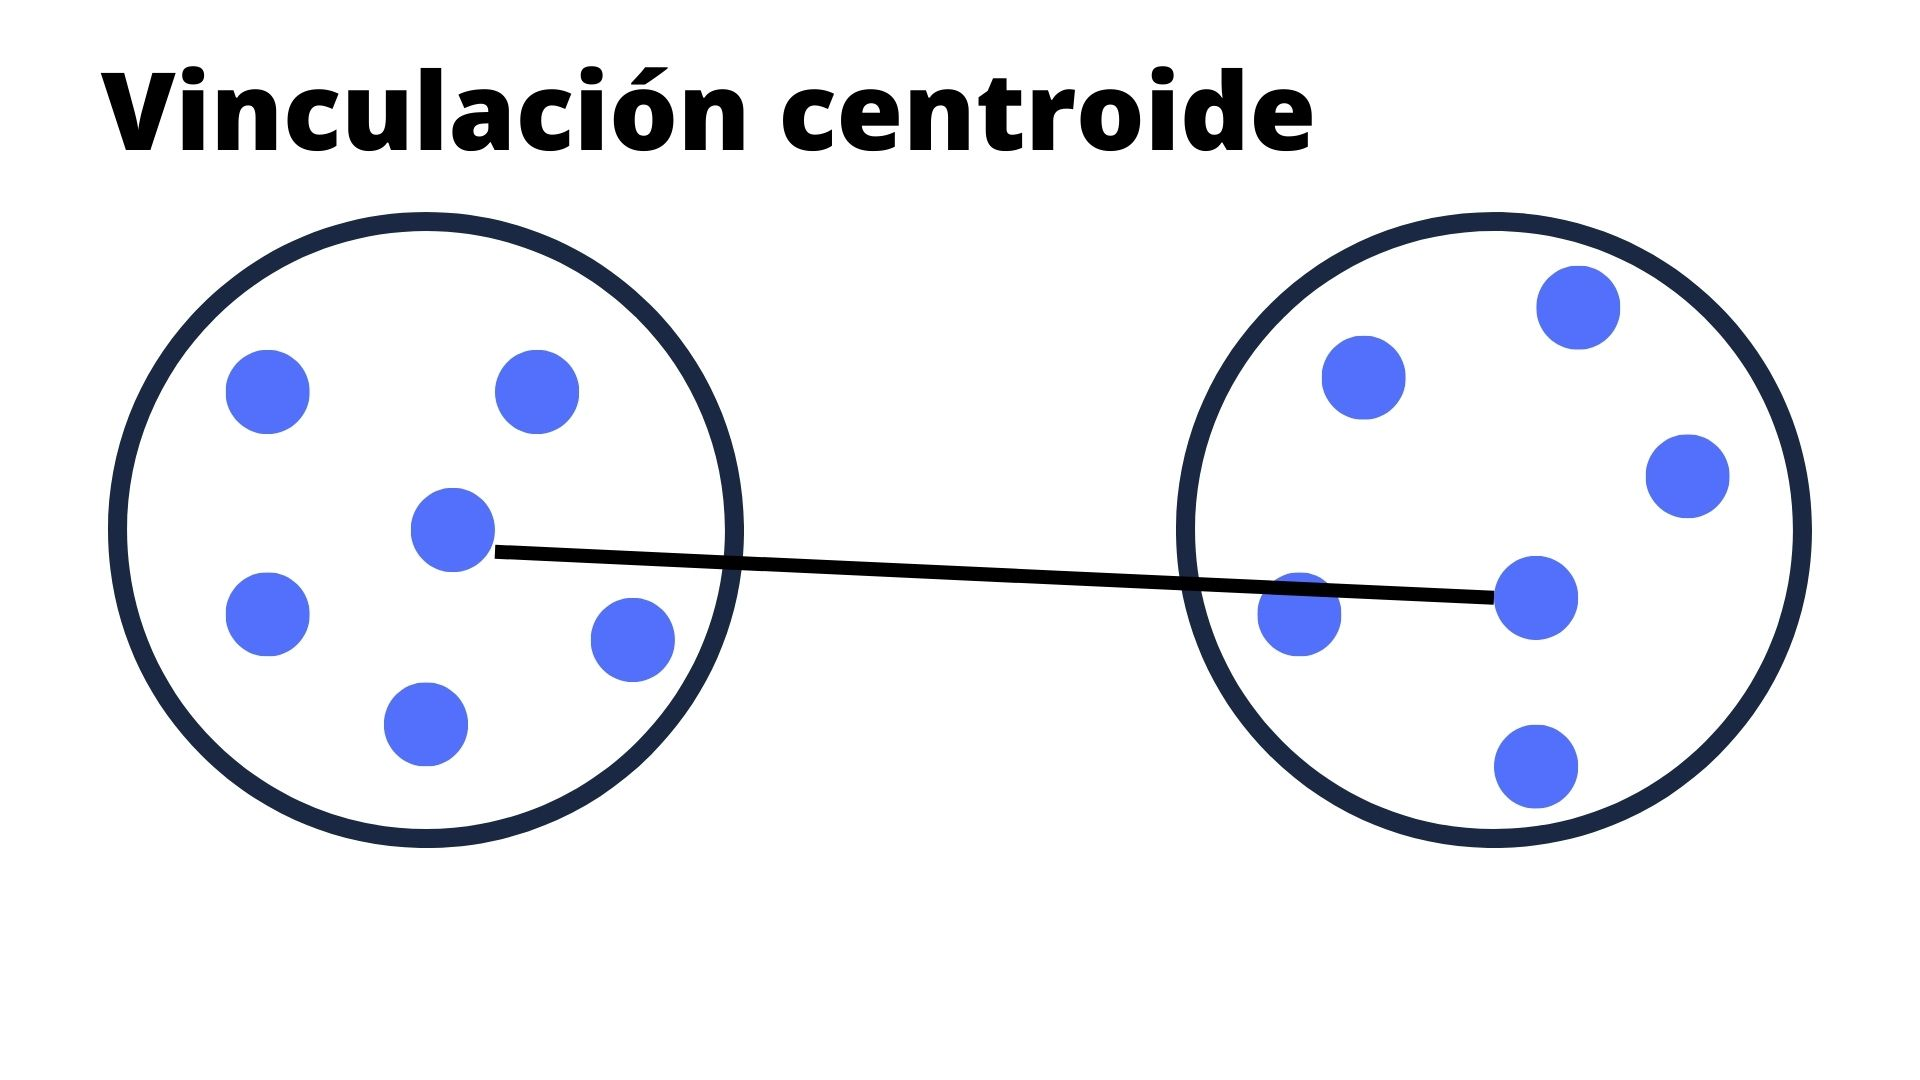

### Métricas de distancia
Además de la vinculación, también es posible especificar algunas de las métricas de distancia más utilizadas:

**Euclidiana**: también conocida como pitagórica o distancia en línea recta. Calcula la distancia entre dos puntos en el espacio, midiendo la longitud de un segmento de línea que pasa entre ellos. Utiliza el teorema de Pitágoras y el valor de la distancia es el resultado (c) de la ecuación:

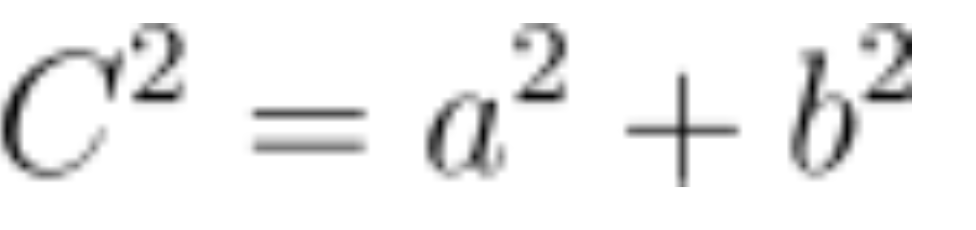

**Manhattan**: también llamado City-block o distancia en taxi. Es la suma de las diferencias absolutas entre las medidas en todas las dimensiones de dos puntos. Si estas dimensiones son dos, es similar a girar a la derecha y luego a la izquierda al caminar una cuadra.

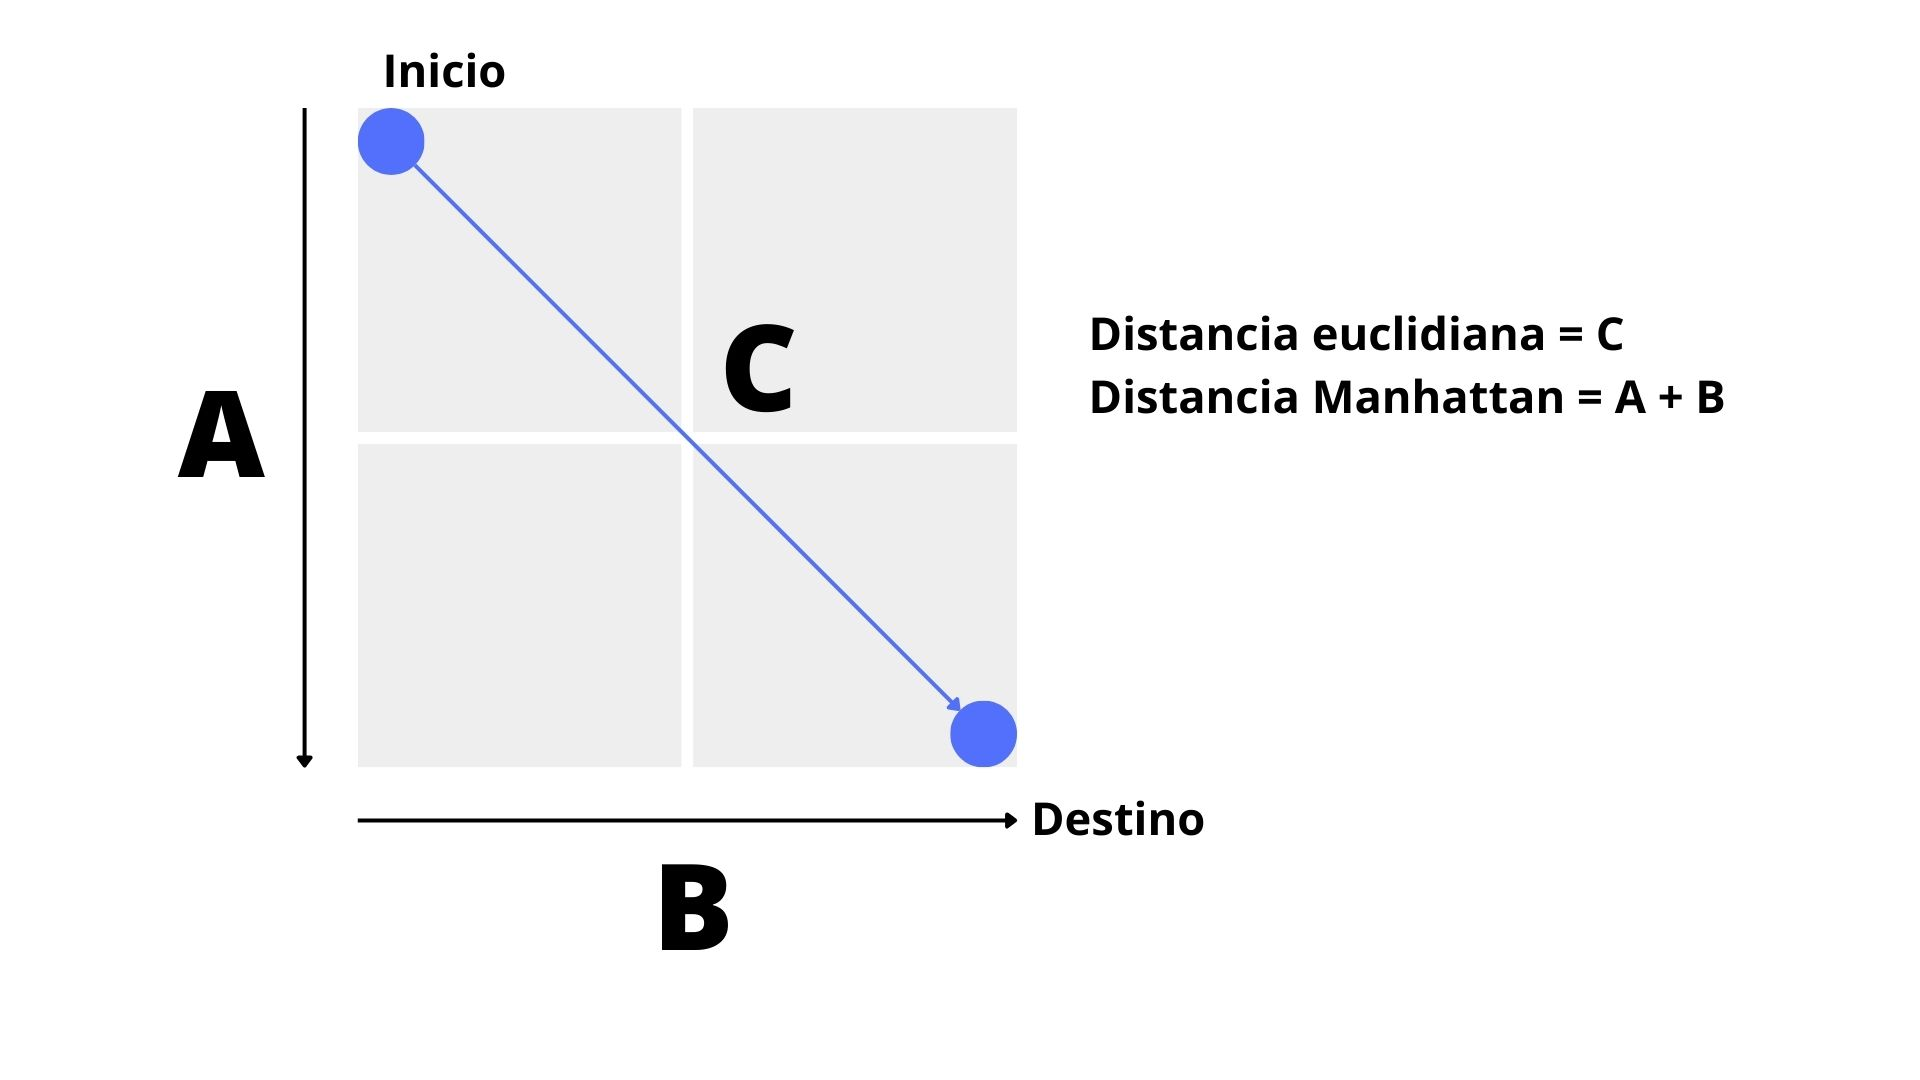

**Minkowski**: es una generalización de las distancias Euclidiana y Manhattan. Constituye una forma de calcular distancias con base en las diferencias absolutas al orden de la métrica  p  de Minkowski . Aunque se define para cualquier  p>0 , pocas veces se usa para valores distintos de 1, 2 y  ∞  (infinito). La distancia de Minkowski es la misma que se obtiene con Manhattan cuando  p=1  y la misma que la euclidiana cuando  p=2

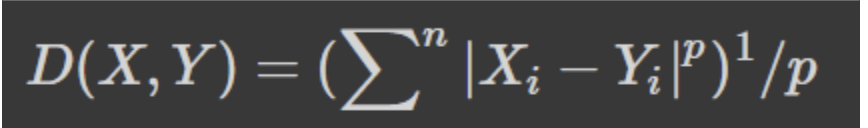


Ahora, se continuará con el análisis del dendrograma para descubrir cómo puede indicarse la cantidad de grupos en un conjunto de datos.

Encontrar un número interesante de clústeres en un dendrograma es lo mismo que encontrar el espacio horizontal más grande que no tiene líneas verticales (el espacio con las líneas verticales más largas). Esto significa que existe más separación entre los grupos.

Para hacer esto, se dibuja una línea horizontal por esa distancia más larga.


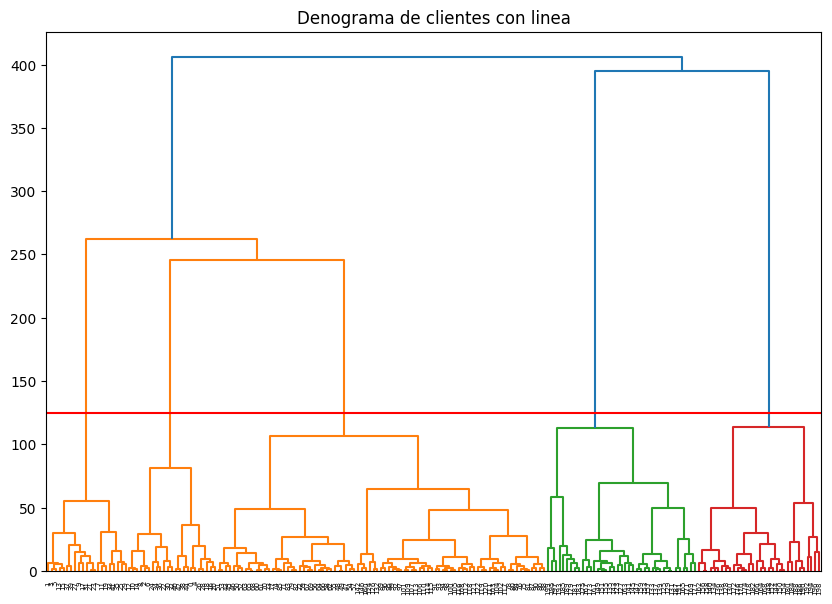

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Denograma de clientes con linea")
clusters = shc.linkage(selected_data,
            method='ward',
            metric="euclidean")
shc.dendrogram(clusters)
plt.axhline(y = 125, color = 'r', linestyle = '-')


Después de ubicar la línea horizontal, se cuenta el número de veces que cruzó las líneas verticales; en este ejemplo, son 5 veces. Entonces, 5 parece una buena indicación de la cantidad de grupos que tienen la mayor distancia entre ellos.

### Implementación de una agrupación jerárquica aglomerativa

Hasta ahora, se ha calculado la cantidad sugerida de grupos para el conjunto de datos que corrobora el análisis inicial y el análisis PCA. En este punto, se puede crear un modelo de agrupamiento jerárquico aglomerativo propio utilizando AgglomerativeClustering y encontrar las etiquetas de los puntos de los datos de marketing con labels_:

In [ ]:
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
clustering_model.fit(selected_data)
clustering_model.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

¿Qué significan estas etiquetas? Aquí, cada punto de datos está etiquetado como un grupo del 0 al 4 graficados:


Text(0.5, 1.0, 'Data de clientes etiquetada')

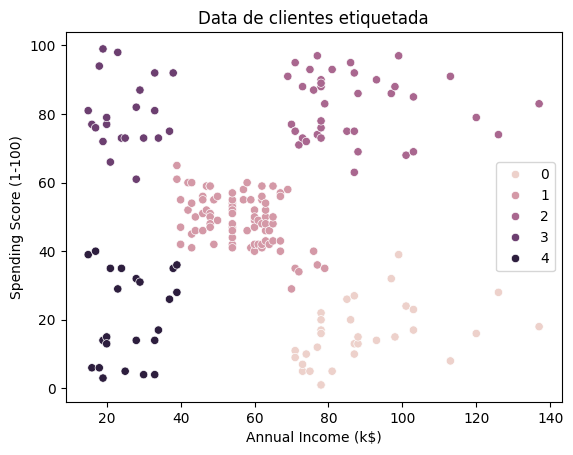

In [ ]:
data_labels = clustering_model.labels_
sns.scatterplot(x='Annual Income (k$)',
                y='Spending Score (1-100)',
                data=selected_data,
                hue=data_labels).set_title('Data de clientes etiquetada')


Estos son los datos agrupados finales. Puedes notar los puntos de datos codificados por colores en forma de cinco grupos.

Los puntos de datos en la parte inferior derecha (etiqueta: 0) pertenecen a los clientes con salarios altos pero gastos bajos. Estos son quienes gastan su dinero con cuidado.

De manera similar, los clientes en la parte superior derecha (etiqueta: 2) son aquellos con salarios altos y gastos elevados. Estos son el tipo de clientes a quienes se dirigen las empresas.

Los clientes en el medio (etiqueta: 1) son aquellos que tienen ingresos y gastos promedio. El mayor número de clientes pertenecen a esta categoría. Las empresas también pueden dirigirse a estos clientes, dado que se encuentran en grandes cantidades.

Los clientes en la parte inferior izquierda (etiqueta: 4) son aquellos con salarios bajos y gastos bajos, que podrían atraerse ofreciendo promociones.

Por último, los clientes en la esquina superior izquierda (etiqueta: 3) son quienes tienen ingresos altos y gastos bajos y constituyen el grupo hacia donde el marketing se dirige idealmente.

Ahora que sabemos el método de agrupación, para que nos sirve y cómo aplicarlo, vamos a otro método de clustering que te será un tanto familiar.

### 5.1.1 K-means

¿Recuerdas la clasificación con el método k-vecinos más cercanos (en inglés, k-nearest neighbours o KNN)? Ese mismo principio aplica en la clusterización, solo que aquí no hay etiquetas, por ende, se trata de un método no supervisado.

Como recordatorio, una "etiqueta" considera entre los  k  vecinos más cercanos cuál se ha repetido más veces, mediante la fórmula  k∈N .

K-means es un algoritmo de clustering (agrupamiento) que tiene como objetivo particionar un conjunto de n observaciones en k clusters en los que cada observación pertenece al cluster con la media más cercana. Es uno de los métodos de clustering más simples y populares en el aprendizaje no supervisado.

El algoritmo de K-means minimiza la suma de las distancias cuadradas entre los puntos y el centroide de su cluster asignado. Matemáticamente, el objetivo es minimizar la función de coste, conocida como la inercia o la suma de cuadrados dentro del cluster (WCSS), definida como:

Para realizar un proceso de agrupación por K-means es importante tener en consideración los siguientes pasos:

1. **Inicialización**: Seleccionar k puntos al azar del conjunto de datos como los centroides iniciales.
2. **Asignación de Cluster**: Asignar cada punto al centroide más cercano, formando k clusters. Esto se hace minimizando la distancia entre el punto y los centroides.
3. **Actualización de Centroides**: Calcular los nuevos centroides como el centro (media) de todos los puntos asignados a cada cluster.
4. **Iteración**: Repetir los pasos 2 y 3 hasta que los centroides no cambien entre iteraciones sucesivas, o el cambio es menor que un umbral predefinido, lo que indica que el algoritmo ha convergido.

Para usar este modelo se necesita la función KMeans, la cual se obtiene del sklearn.cluster.

Esta función solicita varios parámetros, algunos de ellos son los siguientes:

n_clusters: aquí se indica cuántos clusters se desean. Si se omite este parámetro, se tomará el número 8 como valor por defecto.
init: es el método de inicio para la aplicación del modelo. Aquí, k-means++ genera los centroides inciales con base en los datos estadísticos de entrenamiento, mientras que random iniciará con centroides completamente aleatorios. Por ello, se recomienda el uso de k-means++.
max_iter: es el número máximo de iteraciones por cada elemento.
n_init: representa el número de veces que se ejecutará el algoritmo k-means++ con centroides distintos.

Si quieres ver los demás parámetros, puedes visitar la página [sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

Preparemos otro ejemplo:

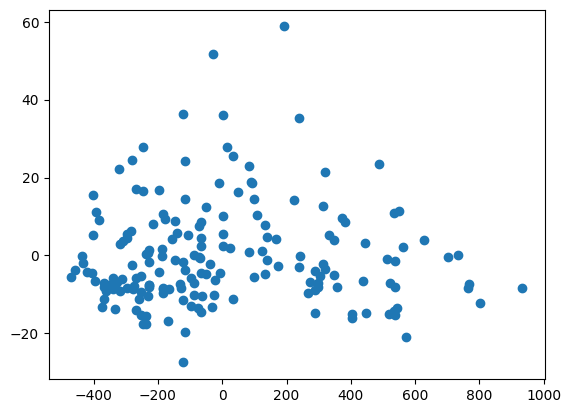

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('https://raw.githubusercontent.com/SanketP1995/Clustering-on-Wine-Dataset/main/wine-clustering.csv')
df.head(5)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df1 = pca.fit_transform(df)


df1_feature1 = df1[:,0]
df1_feature2 = df1[:,1]
plt.scatter(df1_feature1, df1_feature2)
plt.show()


Ahora veamos como lo agrupamos con KMeans

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, init="k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(df1)


El modelo entrenado recibe el nombre de y_means para diferenciarlo del resto. Recuerda que el nombre de un objeto o variable puede modificarse para mayor facilidad, por ello, se sugiere un nombre sencillo de recordar o, en su defecto, hacer comentarios con las almohadillas (#). Esto facilitará la lectura de tu código para futuras revisiones.

Después de entrenar, puedes ver los valores que resulten, ya sea mediante una indicación directa del objeto en Google Colab, en un Notebook o usando print.


In [ ]:
y_kmeans

array([3, 3, 1, 1, 2, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 2, 2, 2,
       3, 3, 2, 2, 1, 1, 3, 3, 1, 1, 3, 1, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2,
       3, 3, 3, 3, 3, 1, 3, 1, 1, 1, 3, 3, 3, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 3, 0, 0, 3, 3, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 3, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 3, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0], dtype=int32)

Que es la asociación de los registros a cada uno de los clusters

También es posible apreciar cuántos resultados se generaron por cada cluster.

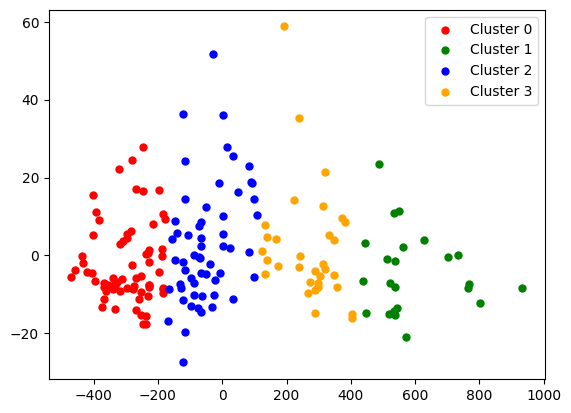

In [ ]:
np.unique(y_kmeans, return_counts= True)

plt.scatter(df1[y_kmeans == 0, 0], df1[y_kmeans == 0, 1], s = 100, marker= '.', c = "red", label = "Cluster 0")
plt.scatter(df1[y_kmeans == 1, 0], df1[y_kmeans == 1, 1], s = 100, marker= '.', c = "green", label = "Cluster 1")
plt.scatter(df1[y_kmeans == 2, 0], df1[y_kmeans == 2, 1], s = 100, marker= '.', c = "blue", label = "Cluster 2")
plt.scatter(df1[y_kmeans == 3, 0], df1[y_kmeans == 3, 1], s = 100, marker= '.', c = "orange", label = "Cluster 3")
plt.legend()
plt.show()

Como se mencionó anteriormente, el algoritmo K-means minimiza la suma de las distancias cuadradas entre los puntos y el centroide de su cluster asignado. Matemáticamente, el objetivo es minimizar la función de coste, conocida como la inercia o la suma de cuadrados dentro del cluster (WCSS), definida como:

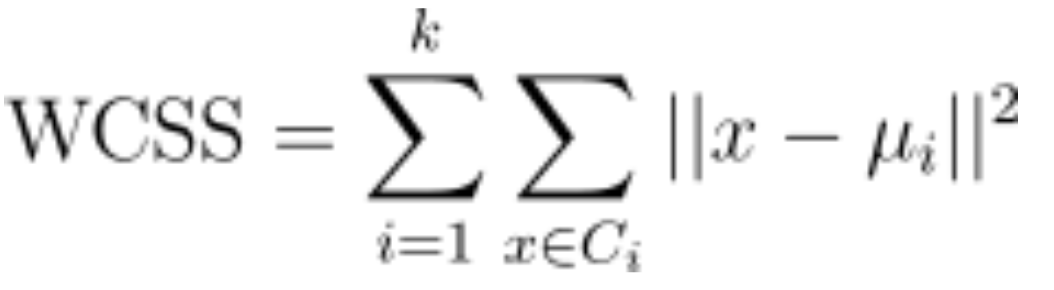

Donde:

- k es el número de clusters.
- Ci es el conjunto de todos los puntos asignados al cluster i
- x es un punto de datos dentro de Ci
- μi es el centroide del cluster i, que es el promedio de todos los puntos en Ci
​- ∣∣x−μi∣∣2 es la distancia euclidiana cuadrada entre el punto x y el centroide μi

Para realizar un entrenamiento bajo este método es importante considerar lo siguiente:

1. **Elección de k**: La elección del número óptimo de clusters, k, no es trivial y es crítica para el rendimiento del algoritmo. Métodos como el "método del codo" y el "método del silueta" se utilizan comúnmente para estimar el valor de k.
2. **Inicialización**: La elección de los centroides iniciales puede afectar significativamente los resultados finales. K-means++ es una técnica que busca mejorar la selección inicial de centroides para aumentar la probabilidad de una solución óptima.
3. **Limitaciones**: K-means asume que los clusters son convexos y isotrópicos, lo cual puede no ser adecuado para algunos conjuntos de datos. Puede ser sensible a los valores atípicos y puede resultar en una convergencia a mínimos locales.

La optimización de los modelos de Clustering es todo un mundo que usa diversos métodos y métricas para saber si estamos haciendo bien el trabajo o no. Los cuales vamos a repasar a continuación

### k-fold Cross Validation

Esto ya lo vimos en un módulo anterior pero no está demás repasar.

La validación cruzada es un método estadístico usado para estimar la habilidad de los modelos de aprendizaje automático.

Se usa comúnmente en el aprendizaje automático aplicado para comparar y seleccionar un modelo para un problema de modelado predictivo dado, porque es fácil de entender y de implementar, y da como resultado estimaciones de habilidades que generalmente tienen un sesgo menor que otros métodos.

La validación cruzada es un procedimiento de remuestreo que se utiliza para evaluar modelos de aprendizaje automático en una muestra de datos limitada.

El procedimiento tiene un solo parámetro, llamado  k , que se refiere a la cantidad de grupos en los que se dividirá una muestra de datos. Como tal, el procedimiento a menudo se denomina validación cruzada de k-fold. Cuando se elige un valor específico para  k , en lugar de  k  en la referencia al modelo, puede usarse  k=10 , convirtiéndose en una validación cruzada de 10 veces.


El procedimiento general es el siguiente:

1. Mezclar aleatoriamente el dataset.
2. Dividir el dataset en k grupos.
3. Para cada grupo único:
  - Tomar al grupo como un dataset de prueba o reserva.
  - Tomar los grupos restantes como un dataset de entrenamiento.
  - Ajustar un modelo en el conjunto de entrenamiento y evaluarlo en el conjunto de prueba.
  - Conservar la puntuación de la evaluación y descartar el modelo.
4. Resumir la habilidad del modelo usando la muestra de puntajes de evaluación del modelo.

El valor  k  debe elegirse cuidadosamente para la muestra de datos.

Un valor de  k  mal elegido puede dar lugar a una idea errónea de la habilidad del modelo, como una puntuación con una varianza alta (que puede cambiar mucho, según los datos utilizados para ajustar el modelo) o un sesgo alto (como una sobreestimación de la habilidad del modelo).

Tres tácticas comunes para elegir un valor para k son las siguientes:

**Representativo**: el valor de  k  se elige de modo que cada grupo de muestras de datos de prueba/entrenamiento sea lo suficientemente grande como para ser estadísticamente representativo del dataset más amplio.

**k=10**: el valor de  k  se fija en  10 , un valor que se ha encontrado por medio de la experimentación, que generalmente da como resultado una estimación de habilidad del modelo con un sesgo bajo y una varianza controlada.

**k=n**: el valor de  k  se fija en  n , donde  n  es el tamaño del dataset para dar a cada muestra de prueba la oportunidad de usarse en el dataset reservado. Este enfoque se denomina validación cruzada de dejar uno afuera.

Imagina que tenemos esta muestra de datos:


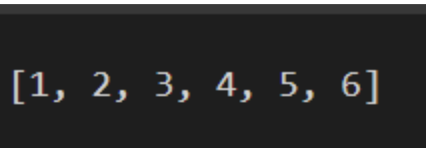


El primer paso es elegir un valor para  k , a fin de determinar el número de pliegues utilizados para dividir los datos. Aquí usaremos un valor de  k=3 , lo cual significa que mezclaremos los datos y luego los dividiremos en 3 grupos. Como tenemos 6 observaciones, cada grupo tendrá el mismo número de 2 observaciones.

Quedaría algo así:

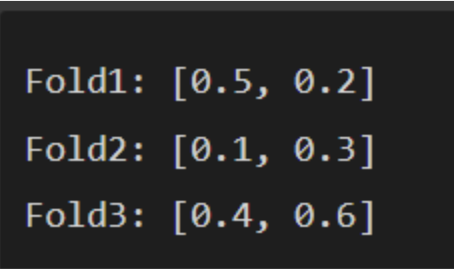

Luego, podemos hacer uso de la muestra; por ejemplo, para evaluar la habilidad de un algoritmo de aprendizaje automático.

Se entrenan y evalúan tres modelos, y cada pliegue tiene la oportunidad de ser el conjunto de prueba extendido.

Por ejemplo:
- Modelo 1 : Entrenado en Fold1 + Fold2, probado en Fold3
- Modelo 2 : Entrenado en Fold2 + Fold3, probado en Fold1
- Modelo 3 : Entrenado en Fold1 + Fold3, robado en Fold2
- Luego de evaluarse, los modelos se descarta, ya que han cumplido su propósito.

Los puntajes de habilidad se recopilan para cada modelo y se resumen para su uso.

No tenemos que implementar manualmente la validación cruzada k-fold. La biblioteca scikit-learn proporciona una implementación que dividirá una muestra de datos determinada.

Se puede usar la clase scikit-learn KFold(). Toma como argumentos el número de divisiones, si se mezcla o no la muestra, y la semilla para el generador de números pseudoaleatorios utilizado antes de la mezcla.

Por ejemplo, podemos crear una instancia que divida un conjunto de datos en  3  pliegues, los baraje antes de la división y use un valor de 1 para el generador de números pseudoaleatorios.


In [ ]:
# Importamos las bibliotecas
from numpy import array
from sklearn.model_selection import KFold

# Generamos nuestra muestra de datos
data = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

# Preparamos la validación cruzada
kfold = KFold(n_splits=3, random_state=1, shuffle=True)

# Enumeramos los dobleces
for train, test in kfold.split(data):
	print('train: %s, test: %s' % (data[train], data[test]))

train: [0.1 0.4 0.5 0.6], test: [0.2 0.3]
train: [0.2 0.3 0.4 0.6], test: [0.1 0.5]
train: [0.1 0.2 0.3 0.5], test: [0.4 0.6]


La implementación de validación cruzada de k-fold en scikit-learn se proporciona como una operación de componente en métodos más amplios, como hiperparámetros de modelo de búsqueda de cuadrícula y puntuación de un modelo en un dataset.

Sin embargo, la clase k-fold se puede usar directamente para dividir un conjunto de datos antes del modelado, de modo que todos los modelos usan las mismas divisiones de datos. Esto es especialmente útil si se está trabajando con muestras de datos muy grandes. El uso de las mismas divisiones entre algoritmos puede tener beneficios para las pruebas estadísticas que desees realizar en los datos más adelante.

Hay una serie de variaciones en el procedimiento de validación cruzada de k-fold.

División de entrenamiento/prueba: llevado a un extremo,  k  se puede establecer en 2 (no en 1), de modo que se cree una única división de entrenamiento/prueba para evaluar el modelo.

- **LOOCV**: llevado a otro extremo,  k  puede establecerse en el número total de observaciones en el dataset, de modo que cada observación tenga la oportunidad de ser retenida del conjunto de datos. Esto se llama validación cruzada de Leave One Out o LOOCV, para abreviar.
- **Estratificado**: la división de datos en pliegues puede regirse por criterios como garantizar que cada pliegue tenga la misma proporción de observaciones, con un valor categórico dado, como el valor de resultado de clase. Esto se llama validación cruzada estratificada.
- **Repetido**: aquí es donde el procedimiento de validación cruzada de  k  veces se repite  n  veces, donde lo más importante: la muestra de datos, se baraja antes de cada repetición, lo que da como resultado una división diferente de la muestra.
- **Anidado**: aquí se realiza la validación cruzada de k-fold dentro de cada pliegue de validación cruzada, a menudo para realizar ajustes de hiperparámetros durante la evaluación del modelo. Esto se denomina validación cruzada anidada o validación cruzada doble.

### Análisis de sensibilidad para k

El parámetro de configuración clave para la validación cruzada de k pliegues es  k , que define el número de pliegues en los que se divide un conjunto de datos determinado.

Los valores comunes son  k=3 ,  k=5  y  k=10 . Por mucho, el valor más utilizado en el aprendizaje automático aplicado para evaluar modelos es  k=10 .

¿Cómo sabemos qué valor de k usar al evaluar modelos en nuestro propio dataset?

Podemos elegir  k=10 , pero ¿cómo sabemos que esto tiene sentido para nuestro dataset?

Un enfoque para responder a esta pregunta es realizar un análisis de sensibilidad para diferentes valores de  k ; es decir, evaluar el rendimiento del mismo modelo en el mismo conjunto de datos con diferentes valores de  k  y ver cómo se comparan.

La expectativa es que los valores bajos de  k  darán como resultado una estimación ruidosa del rendimiento del modelo, y los valores grandes de  k  darán como resultado una estimación menos ruidosa del rendimiento del modelo.

¿Pero ruidoso en comparación con qué?

No conocemos el rendimiento real del modelo cuando hacemos predicciones sobre datos nuevos/no vistos, ya que no tenemos acceso a datos nuevos/no vistos. Si lo hiciéramos, haríamos uso de uno en la evaluación del modelo.

Sin embargo, podemos elegir una condición de prueba que represente una estimación "ideal" o "lo mejor que podamos lograr" del rendimiento del modelo.

Exploraremos cómo implementar un análisis de sensibilidad de la validación cruzada k-fold.

Primero definamos una función para crear el dataset. También puedes usar el tuyo.


In [ ]:
# Importamos las bibliotecas
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# Función que crea el dataset
def get_dataset(n_samples=100):
	X, y = make_classification(n_samples=n_samples, n_features=20, n_informative=15, n_redundant=5, random_state=1)
	return X, y

A continuación podemos definir una función para evaluar el modelo en el dataset, dada una condición de prueba. La condición de prueba podría ser una instancia de k-fold configurada con un valor  k  dado, o podría ser una instancia de LeaveOneOut que represente nuestra condición de prueba ideal.


In [ ]:
# Devuelve el modelo a evaluar
def get_model():
	model = LogisticRegression()
	return model

La función siguiente devuelve la precisión de la clasificación media, así como la precisión mínima y máxima de los pliegues. Podemos usar la mínima y la máxima para resumir la distribución de puntajes.


In [ ]:
# Devuelve las puntuaciones de evaluación del modelo
def evaluate_model(cv):
		# Obtenemos el dataset
		X, y = get_dataset()
		# Obtenemos el modelo
		model = get_model()
		# Evaluamos el modelo con cross validation
		scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
		# Devolvemos las puntuaciones
		return mean(scores), scores.min(), scores.max()


A continuación podemos calcular el rendimiento del modelo utilizando el procedimiento LOOCV.
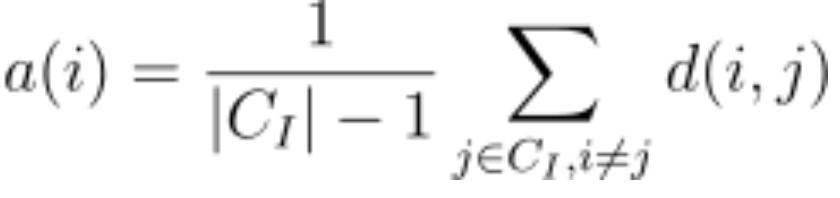

In [ ]:
# Calcular las condiciones ideales de test
ideal, _, _ = evaluate_model(LeaveOneOut())
print('Ideal: %.3f' % ideal)


Ideal: 0.840


Dándonos como resultado ideal aproximado: 0.840

Entonces podemos definir los valores de k para evaluar. En este caso, probaremos valores entre 2 y 30.


In [ ]:
# Definimos los dobleces a probar
folds = range(2,31)

Luego podemos evaluar cada valor y, a su vez, almacenar los resultados a medida que avanzamos.

In [ ]:
# Registramos la media y el mínimo/máximo de cada conjunto de resultados
means, mins, maxs = list(),list(),list()
# Evaluamos cada valor k
for k in folds:
	# Definimos las condiciones del test
	cv = KFold(n_splits=k, shuffle=True, random_state=1)
	# Evaluamos el valor de k
	k_mean, k_min, k_max = evaluate_model(cv)
	# Imprimimos el rendimiento
	print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
	# Guardamos la media de la precisión
	means.append(k_mean)
  # Guardamos mínimo y máximo en relación con la media
	mins.append(k_mean - k_min)
	maxs.append(k_max - k_mean)



> folds=2, accuracy=0.740 (0.700,0.780)
> folds=3, accuracy=0.749 (0.697,0.824)
> folds=4, accuracy=0.790 (0.640,0.920)
> folds=5, accuracy=0.810 (0.600,0.950)
> folds=6, accuracy=0.820 (0.688,0.941)
> folds=7, accuracy=0.799 (0.571,1.000)
> folds=8, accuracy=0.811 (0.385,0.923)
> folds=9, accuracy=0.829 (0.636,1.000)
> folds=10, accuracy=0.850 (0.600,1.000)
> folds=11, accuracy=0.829 (0.667,1.000)
> folds=12, accuracy=0.785 (0.250,1.000)
> folds=13, accuracy=0.839 (0.571,1.000)
> folds=14, accuracy=0.807 (0.429,1.000)
> folds=15, accuracy=0.821 (0.571,1.000)
> folds=16, accuracy=0.827 (0.500,1.000)
> folds=17, accuracy=0.816 (0.600,1.000)
> folds=18, accuracy=0.831 (0.600,1.000)
> folds=19, accuracy=0.826 (0.600,1.000)
> folds=20, accuracy=0.830 (0.600,1.000)
> folds=21, accuracy=0.814 (0.500,1.000)
> folds=22, accuracy=0.820 (0.500,1.000)
> folds=23, accuracy=0.802 (0.250,1.000)
> folds=24, accuracy=0.804 (0.250,1.000)
> folds=25, accuracy=0.810 (0.250,1.000)
> folds=26, accuracy=0.8

En este caso, podemos ver que el resultado LOOCV fue de alrededor de 84 %, valor ligeramente inferior al resultado k=10 del 85 por ciento.

Finalmente, podemos graficar los resultados para su interpretación.


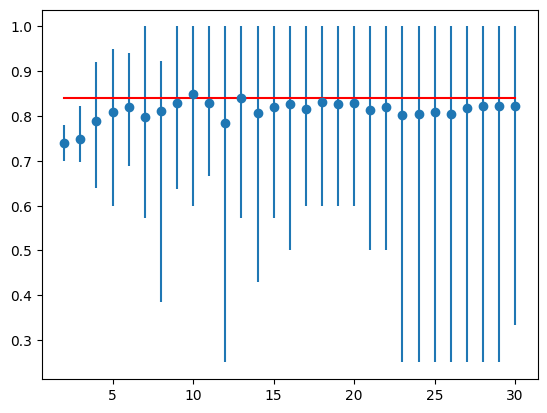

In [ ]:
# Diagrama de línea de k valores medios con barras de error mínimo/máximo
pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# Graficamos el caso ideal en un color diferente
pyplot.plot(folds, [ideal for _ in range(len(folds))], color='r')
# Mostramos la gráfica
pyplot.show()


Los resultados sugieren que para este modelo, en este dataset, la mayoría de los valores de  k  subestiman el rendimiento del modelo en comparación con el caso ideal. Los resultados sugieren que quizá  k=10  solo sea un poco optimista y  k=13  podría ser una estimación más precisa.

### Evaluación de los modelos por medio de métricas

La evaluación del modelo siempre es un paso importante en una canalización de aprendizaje automático, porque nos dice qué tan bueno es el modelo para describir los datos.

Cuando hablamos de evaluaciones de modelos, nos referimos más a menudo a los modelos de aprendizaje supervisado, en los que las etiquetas verdaderas de los datos están disponibles. La métrica de rendimiento en el aprendizaje supervisado se puede desarrollar en función del desacuerdo entre las etiquetas verdaderas y las previstas del modelo.

Ten en cuenta que cuando hablamos de si un agrupamiento es bueno o malo, el agrupamiento en realidad se refiere a la asignación entre el punto de datos y la etiqueta del grupo. Para el mismo conjunto de datos, el agrupamiento mediante un método podría ser bueno, pero el agrupamiento por otro método podría ser malo. Todas las definiciones de distancia anteriores deben basarse en un conjunto de datos ya agrupado (etiquetado).

### Coeficiente de silueta

Como una de las métricas de evaluación de agrupamiento más utilizadas, el coeficiente de silhouette resume la comparación de la distancia intra- o interagrupamiento en una puntuación de entre -1 y 1.

Un valor cercano a 1 indica un resultado de agrupación excelente, en la que las distancias entre grupos son mucho mayores que las distancias dentro de los grupos; mientras que un valor cercano a -1 significa una asignación de clúster totalmente incorrecta, en la que las distancias entre clústeres ni siquiera son comparables con las distancias dentro de los clústeres.

En primer lugar, necesitamos saber cómo calcular las distancias medias intra o inter-clúster para un punto específico.

En cuanto a la distancia dentro del grupo, para cualquier punto de datos  i  que esté dentro del grupo  C , a se define como la distancia media entre  i  y todos los demás puntos de datos dentro de  C .

donde  |CI|  es el número de puntos que pertenecen al grupo  i  , y  d(i,j)  es la distancia entre los puntos de datos  i  y  j  en el grupo  CI  .

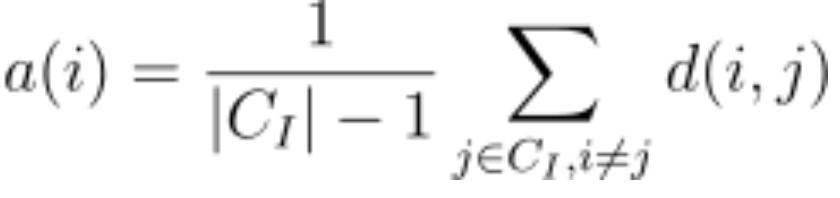


Entonces, para cualquier punto i dado, una puntuación pequeña  a(i)  indica una buena asignación de agrupación para el punto  i  porque está cerca de los puntos dentro del mismo grupo. Por el contrario, una puntuación alta a  (i)  indica una mala agrupación para el punto  i  porque está lejos de los puntos de su propia agrupación.

En cuanto a la distancia entre grupos, para cualquier punto de datos  i , que esté dentro del grupo  C ,  b  se define como la distancia media más pequeña de  i  a todos los puntos en cualquier otro grupo, del cual  i  no es miembro. En otras palabras,  b  es la distancia media entre  i  y todos los puntos de su grupo vecino más cercano.

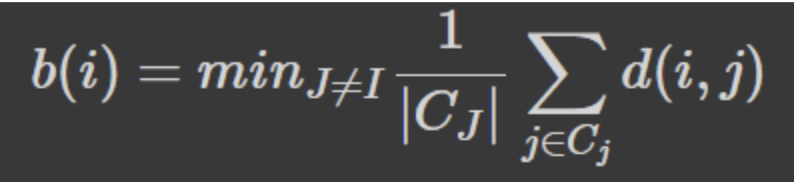

Después de obtener las distancias medias tanto dentro del grupo como entre grupos para cada punto en el conjunto de datos, la puntuación de silueta se define como tal:

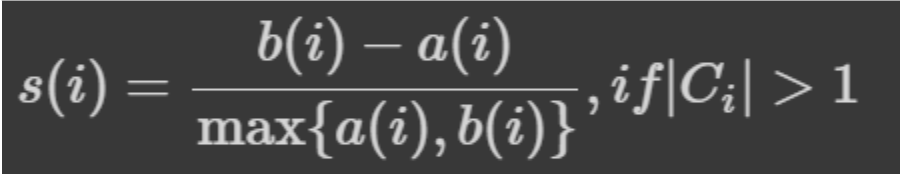


La mayor desventaja de la puntuación de silueta es que es costosa. El tiempo de ejecución muy largo en un conjunto de datos relativamente grande lo hace menos útil en aplicaciones del mundo real.

### Índice de Calinski-Harabasz

El índice de Calinski-Harabasz (también conocido como criterio de la relación de varianza) se define como una relación entre la suma de la distancia al cuadrado entre grupos y la suma de la distancia al cuadrado entre grupos para todos los grupos. La suma de la distancia al cuadrado se corrige mediante el grado de libertad.

Aquí, el intraclúster se estima en función de las distancias desde los puntos de datos en un clúster hasta su propio centroide de clúster, y el interclúster se basa en la distancia de los centroides del clúster desde el centroide global.

El índice de Calinski-Harabasz (CH) para  K  grupos en un conjunto de datos  D  se define como

donde  di  es el vector de características del punto de datos  i ;  nk  es el tamaño del grupo k-ésimo;  ck  es el vector de características del centroide del grupo k-ésimo;  c  es el vector de características del centroide global de todo el conjunto de datos, y  N  es el número total de puntos de datos.

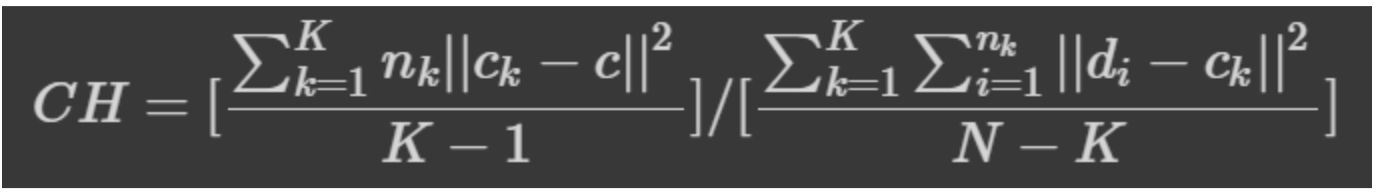


En la ecuación podemos ver que cuanto mayor es CH mejor se separan los grupos entre sí, y no hay un límite superior para CH, como los de la puntuación de silueta.

Pensemos en un resultado de agrupamiento ideal basado en el índice CH. Por ejemplo, que hay varios agrupamientos “globulares”, donde los centroides de los agrupamientos están alejados entre sí y los miembros del agrupamiento están cerca de sus respectivos centroides.

Sin embargo, si los conglomerados no tienen tales formas, las distancias basadas en centroides no serán tan informativas para determinar la calidad del algoritmo del conglomerado. Por lo tanto, no se recomienda el uso del índice CH para los métodos basados ​​en la densidad, como el agrupamiento de desplazamiento medio, DBSCAN, OPTICS, etcétera.


### Índice Davies-Bouldin

El índice de Davies-Bouldin es similar al índice  CH , pero el cálculo de la relación de distancia inter- o intraclúster es inverso al del índice  CH . En el cálculo del índice de Davies-Bouldin hay un concepto, el puntaje de similitud, que mide qué tan similares son dos grupos, que se define de la siguiente manera:

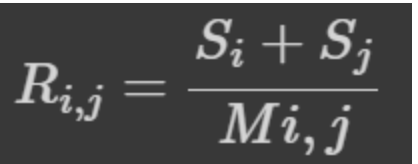


Donde  Rij  es el puntaje de similitud;  Si  y  Sj  son la distancia promedio de los puntos a los centroides dentro del clúster  i  y  j , respectivamente, y  Mij  es la distancia entre los centroides del conglomerado  i  y el conglomerado  j .

Podemos ver en la ecuación que una puntuación de similitud menor indica una mejor separación de grupos, porque un numerador pequeño significa que la distancia dentro de los grupos es pequeña y un denominador grande significa que la distancia entre grupos es grande.

El índice de Davies-Bouldin se define como la puntuación de similitud promedio de todos los clústeres con su clúster vecino más cercano,

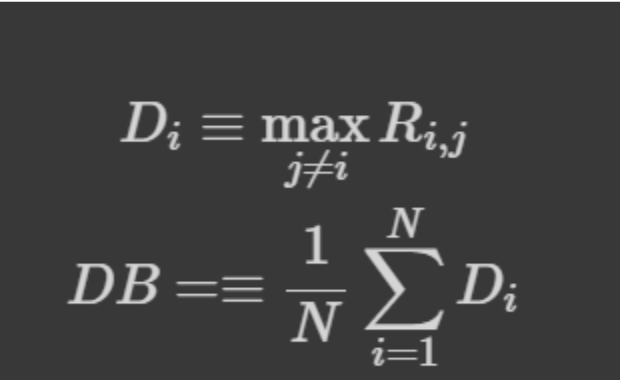

Donde  Di  es la puntuación de similitud peor (mayor) del grupo  i  entre todos los demás grupos, y el índice  DB  final es el  Di  promediado entre  N  grupos.

Podemos ver que cuanto más pequeño es el índice  DB , mejor es la separación de grupos. Tiene una desventaja similar a la del índice  CH , que es malo para manejar métodos de agrupamiento sin una suposición de forma específica (como el agrupamiento basado en la densidad). Pero tanto el índice  CH  como el  DB  son mucho más rápidos que el cálculo de la puntuación de silueta.

Gracias a scikit-learn, implementar estás métricas es muy sencillo:
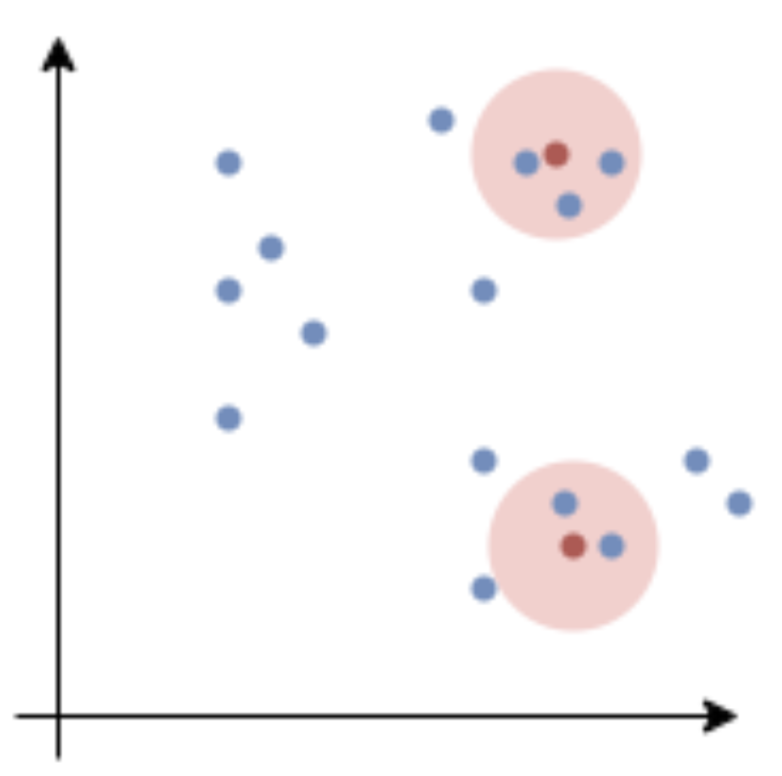

In [ ]:
# Importamos las bibliotecas
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import metrics

# Cargamos un dataset de muestra y hacemos una clusterización por k-means en el
X, y = datasets.load_iris(return_X_y=True)
kmeans = KMeans(n_clusters=3, random_state=1).fit(X)
labels = kmeans.labels_

# Generamos los scores
Silueta = metrics.silhouette_score(X, labels)

Calinski_Harabasz = metrics.calinski_harabasz_score(X, labels)
Davies_Bouldin = metrics.davies_bouldin_score(X, labels)

# Imprimimos los scores
print("Score Analísis de silueta: ", Silueta)
print("Score indice Calinski-Harabasz : ", Calinski_Harabasz)
print("Score indice Davies-Bouldin: ", Davies_Bouldin)


Score Analísis de silueta:  0.5528190123564095
Score indice Calinski-Harabasz :  561.62775662962
Score indice Davies-Bouldin:  0.6619715465007465


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Podemos decir que la agrupación y separación de nuestro modelo de clustering son buenas debido a:

- El análisis de silueta tiende a 1; por ende, tenemos una buena agrupación.
- El índice Calinski-Harabasz es alto: 516; por ende, los grupos se separan mejor entre sí.
- El índice Davies-Bouldin es bajo: de 0.6619...; es decir, tenemos una buena separación entre grupos.

### Métricas de distancia en clustering

La métrica de distancia desempeña un papel crucial en la identificación de estos puntos de datos similares y en la formación de grupos respectivos. K-means utiliza la distancia euclidiana, como la métrica de distancia predeterminada para el clustering. Por lo tanto, es importante jugar con diferentes medidas de distancia para cualquier conjunto de datos.

Vamos a comenzar a comparar el rendimiento de nuestro modelo de clustering con las diferentes métricas de distancia.


In [ ]:
# Esta línea instala lo que necesitamos
!pip install pyclustering

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395100 sha256=308c91cf407f872e259432b607bddad6a067ff2fe8aa4a22890c175cd509b428
  Stored in directory: /root/.cache/pip/wheels/b5/42/97/11eee99f5c1e4fdfc170f0a54f9c9eb195df66edb4cf69f449
Successfully built pyclustering


In [ ]:
# Importamos bibliotecas
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from yellowbrick.cluster import KElbowVisualizer

from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix

from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import distance_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.encoder import type_encoding
from pyclustering.cluster.encoder import cluster_encoder


Aquí usamos PyClustering para implementar el agrupamiento de k-means en dataset de iris usando distancias euclidianas, euclidianas al cuadrado, Manhattan, Chebyshev, canberra y chi-cuadrado. El rendimiento del agrupamiento con estas diferentes medidas de distancia se evalúa mediante una puntuación de pureza (evaluación básica para el agrupamiento).

El dataset se puede encontrar aquí: https://www.kaggle.com/datasets/uciml/iris

Primero leemos el dataset:


In [ ]:
df = pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Después, separamos las características de la etiqueta objetivo:

In [ ]:
X = df.iloc[:, 1:5].values
y = df.iloc[:, -1].values

Determinamos el número óptimo de grupos utilizando el método elbow o método del codo.

El número óptimo de grupos  k  se puede determinar utilizando el método del codo. A medida que aumenta el número de conglomerados, el error de la suma de los cuadrados (SSE) dentro del conglomerado disminuye, porque los puntos de datos se acercan a su centro de conglomerado respectivo. Con el método del codo, el objetivo es encontrar  k , donde SSE disminuye más rápidamente. Por lo tanto, en la figura se puede ver que el número óptimo de grupos es 3; esto es, lo mismo que el número real de clases en el conjunto de datos.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

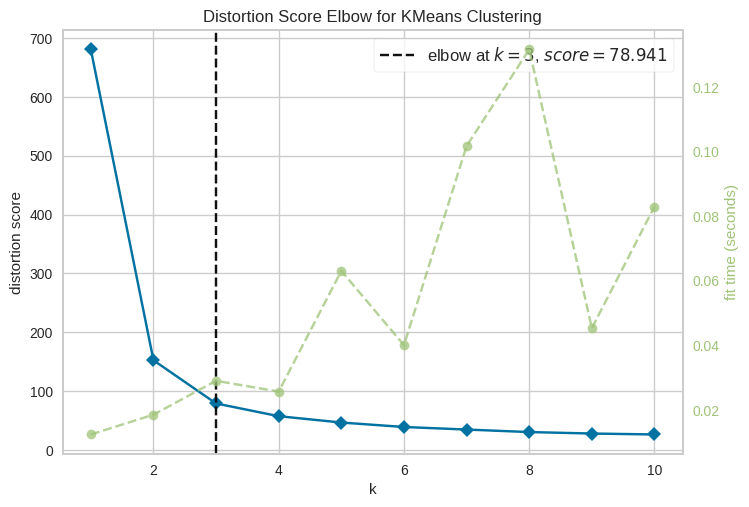

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Iniciamos el modelo y el visualizador
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 11))

visualizer.fit(X) # Hacemos fit a los datos en el visualizador
visualizer.show() # Renderizamos la figura y la mostramos

Como puedes ver, k-means en sklearn no tiene una opción para cambiar la métrica de distanciam y, de forma predeterminada, usa la distancia euclidiana. Primero verifiquemos el rendimiento usando euclidiana y luego comparemos con otra distancia en la sección 6.

In [ ]:
# Instanciamos la clase k-means y ponemos el número de clústers
km_model = KMeans(n_clusters=3, random_state=10)

# Llamamos al método fit con nuestra data
km = km_model.fit_predict(X)

# Obtenemos las coordenadas de los centroides o centros de los clústers
centroids = km_model.cluster_centers_

# etiquetamos cada clúster de datos
labels = km_model.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Después, visualizamos los clústers:

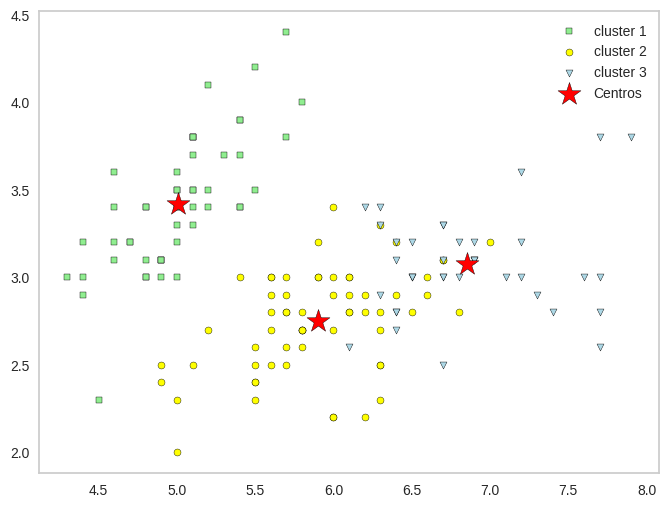

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(
    X[km == 0, 0], X[km == 0, 1],
    s=25, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[km == 1, 0], X[km == 1, 1],
    s=25, c='yellow',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[km == 2, 0], X[km == 2, 1],
    s=25, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# Visualizamos los centros de clústers
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    s=300, marker='*',
    c='red', edgecolor='black',
    label='Centros'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()


Aquí, la puntuación de pureza se calcula mediante ground truth o external accessment. Dado que el conjunto de datos consta de una etiqueta de clase verdadera, la precisión de la etiqueta de clúster calculada con k-means se compara con la clase de etiqueta verdadera.

In [ ]:
def purity_score(y_true, y_pred):
    # Generamos la matriz de contingencia o matriz de confusión
    confusion_matrix = contingency_matrix(y_true, y_pred)
    # Regresamos la métrica de pureza
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix)

# Imprimimos la métrica de pureza
purity = purity_score(y, labels)
print(f"La pureza es de {round(purity*100, 2)}%")


La pureza es de 89.33%


Después, k-means se realiza utilizando la biblioteca de PyClustering para varias métricas de distancia, como Manhattan, Chebyshev, euclidiana, etcétera.

La distancia de Minkowski es solo la generalización de la distancia euclidiana  p=2 ; Manhattan,  p=1 , y chebyshev,  p=Inf .

Aunque para PyClustering los centros iniciales se pueden inicializar usando el algoritmo  k++ , pero he iniciado aleatoriamente el centro inicial para comparar los resultados con sklearn k-means.

La pureza más alta se logra utilizando chi-square como la métrica de distancia.


In [ ]:
# Definimos un diccionario con las métricas de distancia
distance_measures = {'euclidiana': 0,
                     'euclideana cuadrada': 1,
                     'manhattan': 2,
                     'chebyshev': 3,
                     'canberra': 5,
                     'chi-square': 6
                     }

# Función para calcular la puntuación de pureza usando PyClustering para varias medidas de distancia
def pyPurity(dist_measure):
    initial_centers = random_center_initializer(X, 3, random_state=5).initialize()
    # Instancia creada para la métrica de distancia respectiva
    instanceKm = kmeans(X, initial_centers=initial_centers, metric=distance_metric(dist_measure))
    # Hacemos un análisis de clustering
    instanceKm.process()
    # Resultados del análisis de clustering
    pyClusters = instanceKm.get_clusters()
    pyCenters = instanceKm.get_centers()
    # Enumeramos el tipo de codificación para indexar el etiquetado para obtener etiquetas
    pyEncoding = instanceKm.get_cluster_encoding()
    pyEncoder = cluster_encoder(pyEncoding, pyClusters, X)
    pyLabels = pyEncoder.set_encoding(0).get_clusters()
    # Usamos la función de pureza previamente definida
    return purity_score(y, pyLabels)

# Imprimimos los resultados
for measure, value in distance_measures.items():
    print(f"La puntuación de pureza para la distancia {measure} es de {round(pyPurity(value)*100, 2)}%")


La puntuación de pureza para la distancia euclidiana es de 88.67%
La puntuación de pureza para la distancia euclideana cuadrada es de 88.67%
La puntuación de pureza para la distancia manhattan es de 88.67%
La puntuación de pureza para la distancia chebyshev es de 88.67%
La puntuación de pureza para la distancia canberra es de 95.33%
La puntuación de pureza para la distancia chi-square es de 96.0%


A mayor pureza, mejor la distancia a usar en nuestro modelo.

Con estos resultados podemos concluir que para el dataset de iris, al usar k-means como método de clustering, usar la distancia chi-square es la mejor opción. Sin embargo, todas las distancias nos dan resultados óptimos.

Ahora que tenemos todo lo necesario, sigamos con otra técnica de agrupamiento

## 5.1.2 DBSCAN

Existe otra manera de hacer clustering. Imagina que, como en los ejemplos anteriores, solo tienes dos variables que colocarás en plano 2D.

Cada punto de color azul es una observación. En este plano, se indica un punto  p , descrito en los puntos rojos, que tendrá un radio a su alrededor llamado  ϵ .

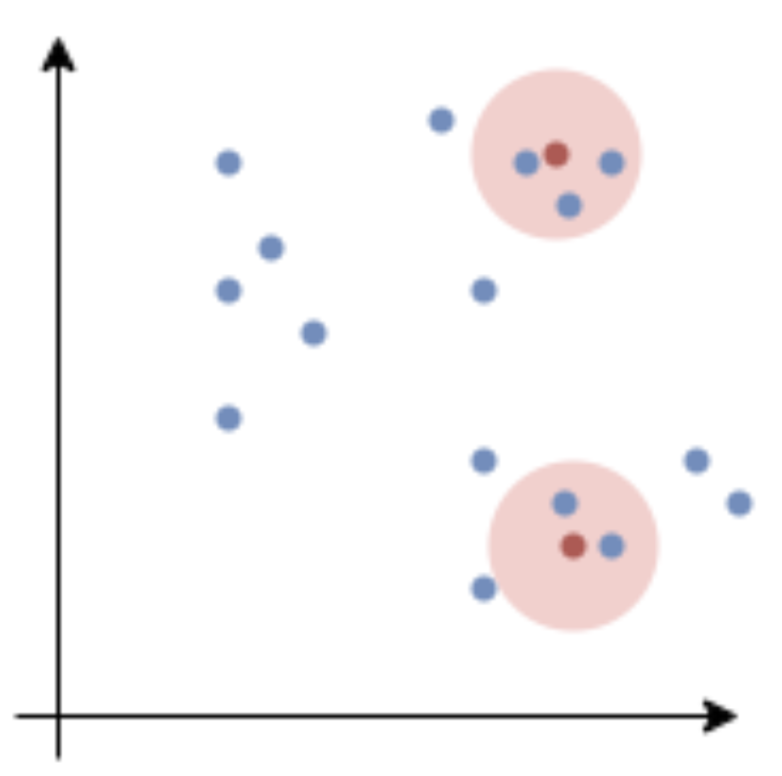

La densidad mide cuántos puntos u observaciones caben dentro del radio  ϵ . En la imagen de arriba se observan dos círculos; en uno de ellos, tres puntos azules están dentro del área sombreada; mientras que en el otro, hay dos al interior. Entonces, esta cantidad se divide entre el área del círculo.

Si el área sombreada mide  1cm2 , entonces se dice que existen tres observaciones por centímetro cuadrado en el primer círculo y dos observaciones por centímetro cuadrado en el segundo.

Este modelo genera distintos puntos  p  y determina en cuáles puntos existe una mayor densidad. Como te imaginas, es posible establecer el valor de  ϵ  así como los valores  p  mínimos que deben existir.

Para finalizar este ejemplo, cabe recordar que se analizó desde una perspectiva 2D; sin embargo, también se aplica a planos 3D (de tres variables), donde  ϵ  se convertirá en una esfera. Aunque resulta difícil pensar en planos de más de tres dimensiones, este modelo se adapta (desde las perspectiva matemática) a cubrir cuantas dimensiones sean necesarias, de manera que si hubiese n-dimensiones, entonces  ϵ  será una esfera de n-dimensiones.

Para este caso seguiremos cuando el dataset y toda la preparación del ejemplo de K-means


In [ ]:
from sklearn.cluster import DBSCAN
density = DBSCAN(eps= 30, min_samples= 3, metric= 'euclidean')
y_density = density.fit_predict(df1)


Dentro de los parámetros que solicita este modelo se encuentran los siguientes:

- **eps**: tamaño del círculo o n-esfera de  ϵ .
- **min_sample**: cantidad mínima de observaciones que debe tener un punto  p  para considerarse un cluster.
- **metric**: el tipo de métrica a usar. Por lo general, se elige la distancia euclidiana.

In [ ]:
y_density

array([ 0,  0,  1, -1,  2, -1,  3,  3,  0,  0, -1,  3,  3, -1, -1,  3,  3,
        0, -1,  4,  2,  2,  0,  0,  4,  4,  1,  3,  4,  0,  3, -1,  0, -1,
        0,  4,  4,  0,  0,  2,  2,  0,  0,  2,  4,  0,  0,  0,  0,  3, -1,
        3,  1, -1,  0,  0,  0,  3,  3,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2, -1,  4,  2,  2,  0,  4,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  4,  4,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  4,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  4,  4,  2])

Presta especial atención al resultado que arroja. Notarás muchos puntos llamados -1. Esto se debe a que estas observaciones no entraron dentro de un cluster. Para solucionarlo, se incrementa eps ( ϵ ) o se disminuye la cantidad en min_samples; sin embargo, estas soluciones pueden aumentar el número de clusters.

A diferencia de otros modelos, aquí no se indica la cantidad de clusters, porque el uso de este modelo depende de tus necesidades.

In [ ]:
np.unique(y_density, return_counts= True)

(array([-1,  0,  1,  2,  3,  4]), array([ 12,  22,   3, 115,  12,  14]))

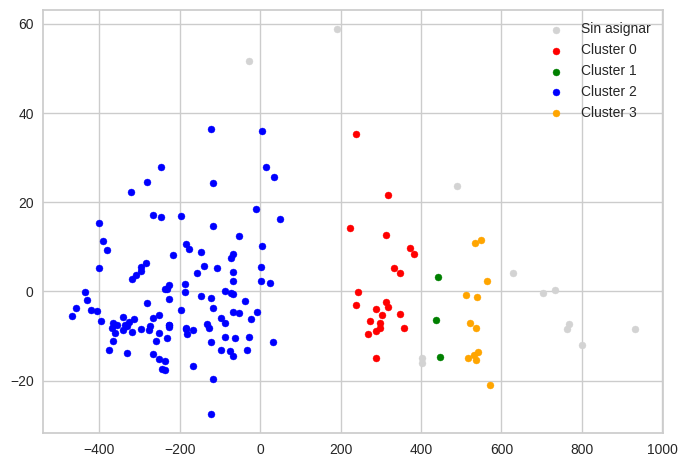

In [ ]:
plt.scatter(df1[y_density == -1, 0], df1[y_density == -1, 1], s = 100, marker= '.', c = "lightgray", label = "Sin asignar")
plt.scatter(df1[y_density == 0, 0], df1[y_density == 0, 1], s = 100, marker= '.', c = "red", label = "Cluster 0")
plt.scatter(df1[y_density == 1, 0], df1[y_density == 1, 1], s = 100, marker= '.', c = "green", label = "Cluster 1")
plt.scatter(df1[y_density == 2, 0], df1[y_density == 2, 1], s = 100, marker= '.', c = "blue", label = "Cluster 2")
plt.scatter(df1[y_density == 3, 0], df1[y_density == 3, 1], s = 100, marker= '.', c = "orange", label = "Cluster 3")
plt.legend()
plt.show()


El funcionamiento de DBSCAN se basa en dos parámetros principales:

- **ε (epsilon)**: Un parámetro de distancia que define el radio alrededor de un punto para considerar a sus vecinos.
- **MinPts (Puntos Mínimos)**: El número mínimo de puntos requeridos para formar un cluster denso.

Un punto p se considera como un punto central si al menos MinPts puntos se encuentran dentro de un radio ε de él (incluyéndose a sí mismo). Estos puntos dentro del radio ε son llamados puntos directamente alcanzables desde p.

El algoritmo DBSCAN procede de la siguiente manera:

1. Para cada punto en el conjunto de datos:
  - Si el punto ya ha sido visitado, continúa al siguiente punto.
  - Marca el punto como visitado.
  - Encuentra todos los puntos vecinos dentro del radio ε del punto actual.
  - Si el número de vecinos es menor que MinPts, marca el punto como ruido (aunque este punto podría ser encontrado más tarde como parte de un cluster).
  - Si el punto es un punto central (tiene MinPts o más vecinos, incluyéndose a sí mismo), inicia la expansión del cluster. Agrega todos los puntos alcanzables a este cluster, posiblemente marcando como cluster puntos que previamente se habían marcado como ruido.
2. Expansión del Cluster:
  - Para cada nuevo punto agregado al cluster, encuentra todos sus vecinos dentro del radio ε.
  - Si un vecino es un punto central, repite el proceso de expansión del cluster con este nuevo punto central.


Y como nada es perfecto, el método de DBSCAN tiene diversas desventajas como las siguientes:

Sensibilidad a los Parámetros: La selección de ε y MinPts puede tener un gran impacto en los resultados del clustering.
Dificultad con Densidades Variables: DBSCAN puede tener dificultades para identificar clusters en datos con variaciones significativas en la densidad.

Pero también tiene múltiples ventajas que lo hacen una opción viable

- Flexibilidad en la Forma de los Clusters: Puede encontrar clusters de formas arbitrarias.
- Robusto frente al Ruido: Capaz de identificar y excluir puntos de ruido.
- No necesita el número de clusters: A diferencia de K-means, no es necesario especificar el número de clusters de antemano.

DBSCAN es especialmente útil en aplicaciones de detección de anomalías, análisis de imágenes, y cualquier dominio donde la intuición de "densidad" y "ruido" sea útil para identificar agrupaciones naturales en los datos. Su capacidad para manejar clusters de formas no esféricas y su robustez frente al ruido lo hacen adecuado para conjuntos de datos complejos y de la vida real.

Ahora que ya tenemos comprendidos dos de los métodos más populares de clustering vamos a una de las tareas más importantes y que ya tratamos un poco en este módulo, el PCA


## 5.2 Reducción de dimensionalidad
### 5.2.1 Análisis de componentes principales (PCA)

El Análisis de Componentes Principales (PCA, por sus siglas en inglés) es una técnica de reducción de dimensionalidad utilizada en el campo del aprendizaje automático y la estadística para describir un conjunto de datos en términos de nuevas variables ("componentes") no correlacionadas. Los componentes se ordenan por la cantidad de varianza original que cada uno captura del conjunto de datos.

El objetivo de PCA es encontrar una proyección que transforme los datos originales X (con n variables) en un nuevo espacio de características de menor dimensión (con k variables, donde k<n) de manera que se maximice la varianza de los datos en este nuevo espacio. Esto se logra a través de la diagonalización de la matriz de covarianza de los datos o, equivalentemente, mediante la descomposición en valores singulares (SVD) de la matriz de datos.

Internamente el proceso de PCA realiza lo siguiente:

1. Estandarización de los Datos: Dado un conjunto de datos X de dimensiones m×n (donde m es el número de muestras y n es el número de características), se estandarizan las características para tener media 0 y varianza 1.
Matriz de Covarianza: Se calcula la matriz de covarianza C de los datos estandarizados. La matriz de covarianza captura cómo cambian conjuntamente las variables.
2. Descomposición en Valores Propios: Se calculan los valores propios y los vectores propios de la matriz de covarianza. Los vectores propios representan las direcciones de máxima varianza (componentes principales), y los valores propios corresponden a la magnitud de la varianza que cada componente principal captura.
3. Selección de Componentes Principales: Se seleccionan los k vectores propios que corresponden a los k mayores valores propios para formar la matriz de proyección W. Esta matriz transforma los datos originales en el nuevo espacio de características.
4. Transformación de los Datos: Los datos originales X se proyectan en el nuevo espacio de características usando la matriz W para obtener los datos transformados Y.

Para ver cómo se implementa el PCA con Python revisa el siguiente código:


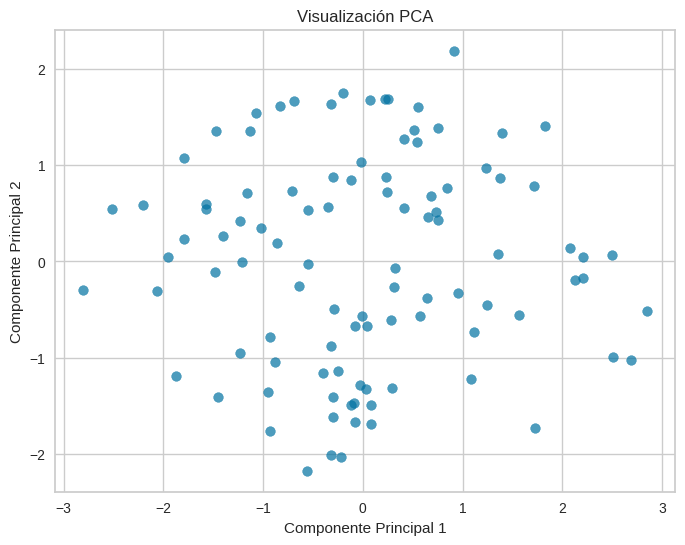

Varianza explicada por cada componente: [0.29005782 0.23214006]


In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Generación de un conjunto de datos de ejemplo
np.random.seed(42)
X = np.random.rand(100, 5)  # 100 muestras, 5 características

# Estandarización de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicación de PCA
pca = PCA(n_components=2)  # Reducir a 2 componentes
X_pca = pca.fit_transform(X_scaled)

# Visualización de los datos transformados
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
plt.xlabel('Componente Principal 1')

plt.ylabel('Componente Principal 2')
plt.title('Visualización PCA')
plt.show()

# Varianza explicada por cada componente
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)

Este código realiza PCA sobre un conjunto de datos sintético, reduciendo su dimensionalidad de 5 características a 2 componentes principales, y luego visualiza los datos transformados. La varianza explicada por cada componente se imprime al final, indicando cuánta información (varianza) captura cada componente del conjunto de datos original.

PCA es una herramienta poderosa para la reducción de dimensionalidad, visualización de datos, y preprocesamiento para otros algoritmos de aprendizaje automático. Al capturar las direcciones de máxima varianza, PCA puede revelar estructuras subyacentes en los datos que podrían no ser evidentes de inmediato. Sin embargo, es importante recordar que PCA asume linealidad en los datos y puede no ser adecuado para todos los conjuntos de datos, especialmente aquellos con relaciones no lineales complejas.

El PCA no es el único método de reducción de columnas o dimensiones, existe otra opción la cual vamos a revisar a continuación:

### 5.2.2 T-distributed stochastic neighbor embedding (t-SNE)

t-SNE (t-Distributed Stochastic Neighbor Embedding) es una técnica avanzada de reducción de dimensionalidad y visualización de datos de alta dimensión en un espacio de menor dimensión, idealmente en dos o tres dimensiones. Es especialmente útil para la exploración y visualización de estructuras complejas en grandes conjuntos de datos.

t-SNE comienza por convertir las distancias entre los puntos en probabilidades condicionales que representan similitudes. La similitud entre dos puntos xi y xj en el espacio de alta dimensión se mide por la probabilidad condicional pj∣i, que es proporcional a la densidad de probabilidad de xj en relación con xi bajo una distribución Gaussiana centrada en xi.

La probabilidad pij es la media simétrica de pj∣i y pi∣j


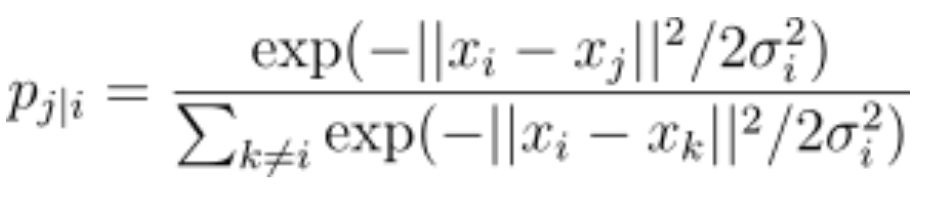

En el espacio de baja dimensión, t-SNE utiliza una distribución t-Student con un grado de libertad para definir las probabilidades qij entre puntos, reduciendo así el problema de agrupamiento excesivo (crowding problem) y permitiendo una mejor representación visual de los clusters.

La probabilidad conjunta pij se define como la media simétrica de las probabilidades condicionadas pj∣i y pi∣j, lo que hace que la medida de similitud sea más robusta y menos sensible a las variaciones en la densidad de los datos.
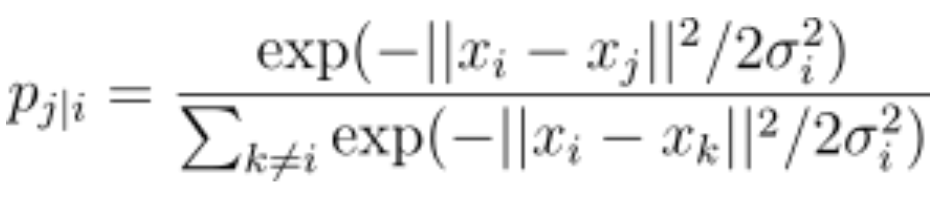


Probabilidad en el Espacio de Baja Dimensión qij: Esta fórmula define las probabilidades qij en el espacio de baja dimensión utilizando una distribución t-Student con un grado de libertad. El objetivo es mitigar el problema de crowding y permitir una separación más clara entre los clusters en la visualización.

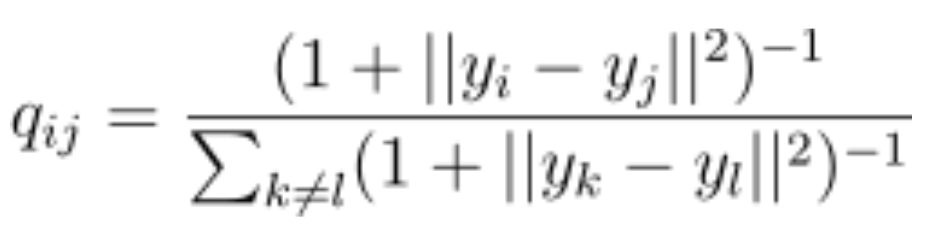

El objetivo es minimizar la divergencia de Kullback-Leibler (KL) entre las distribuciones de probabilidad en el espacio de alta dimensión P y en el espacio de baja dimensión Q, lo cual se logra ajustando las posiciones de los puntos en el espacio de baja dimensión.

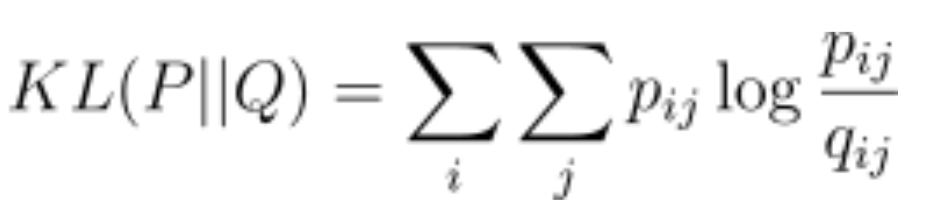

La divergencia de Kullback-Leibler es una medida de cuánto se diferencia una probabilidad de distribución P de otra distribución de probabilidad Q. t-SNE minimiza esta divergencia para hacer que la distribución de baja dimensión refleje lo más fielmente posible la estructura de los datos en alta dimensión.

Ahora vamos a realizar una implementación en Python


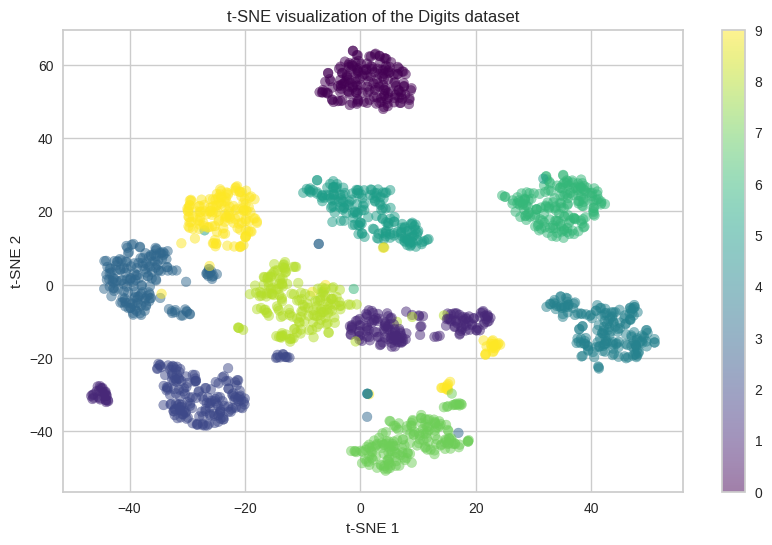

In [ ]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# Cargamos el conjunto de datos de dígitos
digits = load_digits()
X = digits.data
y = digits.target

# Aplicamos t-SNE para reducir la dimensionalidad a 2D
tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)

# Visualizamos el resultado
plt.figure(figsize=(10, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.colorbar()
plt.title('t-SNE visualization of the Digits dataset')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()


Este código reduce la dimensionalidad de un conjunto de datos de dígitos escritos a mano y visualiza los datos transformados, donde cada punto representa una imagen de un dígito y su color representa la clase del dígito.

Como todos los métodos, existen ventajas y desventajas en su implementación.

Ventajas:
- Excelente para visualizar datos de alta dimensión en espacios de 2D o 3D.
- Capaz de revelar estructuras complejas y clusters en los datos.

Desventajas:
- Sensible a la elección de parámetros como la perplejidad y el número de iteraciones.
- No garantiza la misma salida en diferentes ejecuciones debido a su naturaleza estocástica.
- Computacionalmente intensivo, especialmente en grandes conjuntos de datos.

t-SNE es ampliamente utilizado en análisis exploratorio de datos, especialmente para visualizar conjuntos de datos de alta dimensión en campos como la bioinformática, la medicina, y las ciencias sociales. También se utiliza para la inspección visual de los resultados de algoritmos de aprendizaje automático, como la verificación de la efectividad de la agrupación (clustering) o la detección de anomalías.

t-SNE es una poderosa herramienta para la visualización de datos de alta dimensión que puede revelar estructuras intrincadas ocultas dentro de grandes conjuntos de datos. Aunque es altamente efectivo, el uso adecuado de t-SNE requiere una comprensión de sus parámetros y limitaciones, especialmente cuando se trata de interpretar los resultados y aplicarlos a problemas del mundo real.

Ahora pasemos a otro tema, las reglas de asociación que nos indican las condiciones para que un elemento se adhiera a un cluster u otro

## 5.3 Reglas de asociación
### 5.3.1 Algoritmo Apriori

Las reglas de asociación son una técnica clave en el análisis de datos para descubrir interesantes relaciones entre variables en grandes bases de datos. Son ampliamente utilizadas en diversos campos como el marketing, la detección de fraudes, y el análisis de cestas de la compra en el retail. Una de las metodologías más famosas para encontrar estas reglas es el algoritmo Apriori.

El algoritmo Apriori se basa en la idea de que una subconjunto frecuente debe ser parte de un conjunto frecuente. Utiliza un enfoque iterativo conocido como "nivel por nivel" donde k-items sets se utilizan para explorar (k+1)-items sets.

**Soporte (Support)**: La frecuencia con la que aparece un conjunto de ítems en el dataset. Para un conjunto de ítems A, se calcula como la proporción de transacciones en la base de datos que contienen A.


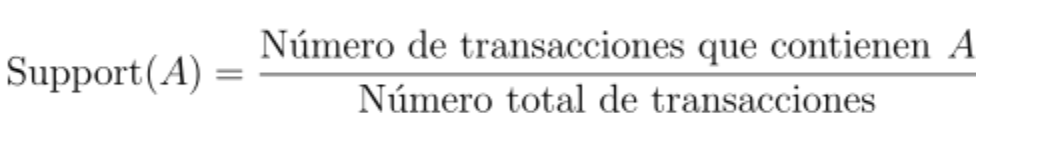

**Confianza (Confidence)**: Mide la frecuencia con la que los ítems en B aparecen en transacciones que contienen A. Es una medida de la probabilidad condicional P(B∣A).

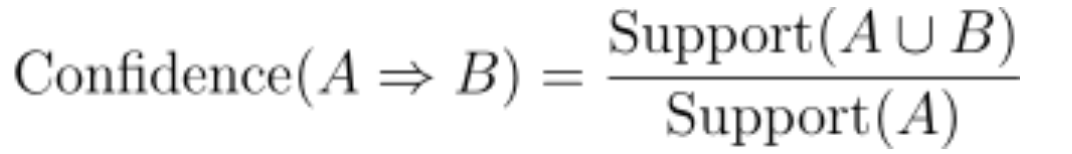

**Elevación (Lift)**: La razón de la confianza de una regla y el soporte esperado de B si A y B fueran independientes. Un valor de elevación mayor a 1 indica una fuerte asociación.

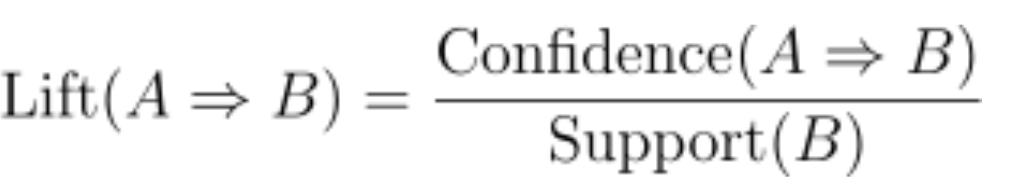

Para implementar este algoritmo en Python Vamos a usar la biblioteca mlxtend:

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

# Ejemplo de dataset de transacciones
dataset = [['Leche', 'Pan', 'Cereal'],
           ['Pan', 'Huevos', 'Mantequilla'],
           ['Leche', 'Pan', 'Huevos'],
           ['Leche', 'Huevos']]

# Preprocesamiento
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Aplicando Apriori
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)

# Generando reglas de asociación
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

print(frequent_itemsets)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


   support         itemsets
0     0.75         (Huevos)
1     0.75          (Leche)
2     0.75            (Pan)
3     0.50  (Huevos, Leche)
4     0.50    (Huevos, Pan)
5     0.50     (Leche, Pan)
Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


Los muestran tanto los conjuntos de ítems frecuentes como las reglas de asociación generadas a partir del conjunto de datos de ejemplo.

Los conjuntos de ítems frecuentes con un soporte de al menos 0.5 (50%) son:

- Ítems Individuales:
  - Huevos, Leche, Pan: Cada uno aparece en el 75% de las transacciones. Esto indica que son productos comúnmente comprados, presentes en la mayoría de las transacciones.
- Pares de Ítems:
  - (Leche, Huevos), (Pan, Huevos), (Pan, Leche): Cada par aparece en el 50% de las transacciones. Estos pares representan combinaciones de productos que los clientes tienden a comprar juntos con relativa frecuencia.


La salida indica que no se han generado reglas de asociación que cumplan con el umbral de confianza mínimo de 0.7. Esto significa que, aunque ciertos productos se compran frecuentemente juntos, no hay una confianza suficientemente alta en las transacciones analizadas para afirmar que la compra de un producto implica la compra de otro con al menos un 70% de certeza.

Productos Populares: Huevos, Leche y Pan son claramente productos populares dentro de este dataset, ya que aparecen en tres cuartas partes de las transacciones. Esto podría indicar que son productos básicos para los clientes.


- Compras Combinadas: Las combinaciones de Leche y Huevos, Pan y Huevos, y Pan y Leche, sugieren que estos productos tienden a ser comprados juntos en la mitad de las ocasiones. Esto podría ser útil para estrategias de marketing, como ofertas cruzadas o promociones.
- Ausencia de Reglas Fuertes: La falta de reglas de asociación con una alta confianza sugiere que, aunque hay patrones de compra en común, no hay una relación fuerte y consistente en este conjunto de datos que indique que la compra de un producto garantice la compra de otro. Esto puede deberse a la diversidad en las preferencias de compra o a que el conjunto de datos es demasiado pequeño para derivar conclusiones firmes.
- Estrategias de Negocio: Para una tienda, conocer los ítems que se compran juntos frecuentemente puede ayudar en la disposición de los productos dentro de la tienda para incentivar la venta cruzada, o en el diseño de ofertas especiales que incluyan estos productos. Sin embargo, la ausencia de reglas fuertes también sugiere la importancia de explorar otros datos o técnicas para comprender mejor las preferencias de los clientes.
- Consideraciones Adicionales: La ausencia de reglas fuertes puede motivar el ajuste de los parámetros de soporte y confianza para explorar si se pueden encontrar reglas significativas con criterios menos estrictos. Además, podría ser útil ampliar el conjunto de datos o incluir más características de las transacciones para obtener insights más profundos.


Ya una vez interpretados los resultados y entendido mejor como funciona el algoritmo Apriori veamos algunas ventajas y desventajas

Ventajas:
- Simple y fácil de entender.
- Puede manejar grandes volúmenes de datos.
- Identifica relaciones útiles entre variables.

Desventajas:
- Puede generar un gran número de reglas, muchas de las cuales pueden no ser útiles.
- La elección de los umbrales de soporte y confianza puede ser arbitraria y afectar los resultados.
- El rendimiento puede disminuir con datasets muy grandes debido a la necesidad de múltiples barridos a través de los datos.

El algoritmo Apriori es una herramienta fundamental en minería de datos para descubrir reglas de asociación. Aunque enfrenta desafíos en términos de eficiencia y selección de parámetros, sigue siendo ampliamente utilizado por su capacidad para revelar relaciones interesantes y no triviales en grandes conjuntos de datos.

Ahora veamos otro tipo de regla de asociación.


## 5.3.2 Algoritmo FP-Growth

El algoritmo FP-Growth (Frequent Pattern Growth) es una técnica eficiente para la extracción de conjuntos de ítems frecuentes, que son conjuntos de elementos que aparecen juntos con frecuencia en un dataset. A diferencia del algoritmo Apriori, que es ampliamente utilizado para el mismo propósito, FP-Growth mejora significativamente la eficiencia al eliminar la necesidad de candidatos a generar y testear, reduciendo así el costo computacional.

FP-Growth utiliza una estructura de datos llamada FP-tree (Frequent Pattern Tree) para comprimir el dataset en un formato condensado, preservando la información de los conjuntos de ítems frecuentes. El proceso de FP-Growth se puede dividir en dos pasos principales:

- Construcción del FP-tree: Primero, crea una lista de ítems frecuentes ordenados por frecuencia descendente. Luego, construye el FP-tree pasando por cada transacción del dataset y trazando un camino en el árbol. Si un prefijo de la transacción ya existe, incrementa los contadores de nodos existentes; de lo contrario, crea nuevos nodos.
- Extracción de Conjuntos de Ítems Frecuentes: A partir del FP-tree, extrae conjuntos de ítems frecuentes utilizando un enfoque recursivo. Para cada ítem en el árbol, considera todas las posibles combinaciones de ítems frecuentes que incluyen ese ítem y calcula su soporte contando las ocurrencias en el árbol.

Para implementar el algoritmo FP-Growth en Python, podemos utilizar la biblioteca mlxtend:


In [ ]:
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

# Ejemplo de dataset de transacciones
dataset = [['Milk', 'Bread', 'Apples'],
           ['Bread', 'Eggs', 'Butter'],
           ['Milk', 'Bread', 'Eggs'],
           ['Milk', 'Eggs']]

# Preprocesamiento
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Aplicación de FP-Growth
frequent_itemsets = fpgrowth(df, min_support=0.5, use_colnames=True)

print(frequent_itemsets)

   support       itemsets
0     0.75         (Milk)
1     0.75        (Bread)
2     0.75         (Eggs)
3     0.50  (Bread, Milk)
4     0.50  (Bread, Eggs)
5     0.50   (Eggs, Milk)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Este código genera conjuntos de ítems frecuentes utilizando FP-Growth basado en un soporte mínimo del 50%. La salida mostrará los conjuntos de ítems que cumplen con este criterio de soporte.

**Ítems Individuales:**
- Milk, Bread, y Eggs tienen un soporte del 75%, lo que significa que cada uno de estos ítems aparece en el 75% de todas las transacciones (3 de 4 transacciones). Esto indica que son los productos más populares o comunes comprados juntos en este pequeño dataset.

**Pares de Ítems:**
- Los conjuntos de ítems (Bread, Milk), (Bread, Eggs), y (Milk, Eggs) tienen cada uno un soporte del 50%. Esto significa que estos pares de productos aparecen juntos en el 50% de todas las transacciones (2 de 4 transacciones). Estos pares representan combinaciones de productos que los clientes tienden a comprar juntos con una frecuencia relativamente alta, dada la escala de este dataset.

**Productos Centrales**: La leche, el pan y los huevos son claramente elementos esenciales para los clientes representados en este dataset. Dado su alto soporte individual, estos ítems podrían ser considerados como productos básicos en un entorno de retail o supermercado.

**Oportunidades de Marketing Cruzado**: Las combinaciones de (Bread, Milk), (Bread, Eggs), y (Milk, Eggs) sugieren oportunidades para marketing cruzado o promociones. Por ejemplo, ofrecer descuentos en huevos cuando se compra leche podría incentivar ventas adicionales.

**Estrategias de Inventario**: El alto soporte de estos ítems y sus combinaciones sugiere que deberían ser mantenidos en stock con prioridad para evitar pérdidas de ventas. Además, estos ítems podrían ser colocados juntos en la tienda para aumentar la conveniencia del cliente y fomentar la compra por impulso de productos relacionados.

**Análisis de FP-Growth:** La eficiencia del algoritmo FP-Growth se demuestra en su capacidad para identificar rápidamente estos conjuntos de ítems frecuentes sin la necesidad de generar candidatos, como se requeriría en el enfoque Apriori. Esto es particularmente ventajoso cuando se trabaja con datasets grandes.

Antes de elegir este algoritmo como tu opción vamos a repasar sus ventajas y desventajas.

**Ventajas:**
- Eficiencia: FP-Growth es significativamente más eficiente que Apriori, ya que no necesita generar y testear explícitamente conjuntos de ítems candidatos.
- Escalabilidad: Maneja grandes datasets de manera más efectiva que otros algoritmos de extracción de conjuntos de ítems frecuentes.
- Menor Costo Computacional: Al utilizar la estructura FP-tree, reduce la cantidad de barridos completos del dataset.

**Desventajas:**
- Complejidad de Implementación: La estructura y el proceso de extracción del FP-tree son más complejos que los métodos basados en candidatos.
- Uso de Memoria: La construcción de un FP-tree puede requerir una cantidad significativa de memoria si el dataset es grande y hay muchos conjuntos de ítems frecuentes.

FP-Growth es un algoritmo poderoso y eficiente para la extracción de conjuntos de ítems frecuentes, ofreciendo ventajas significativas en términos de eficiencia y escalabilidad sobre técnicas anteriores como Apriori. Sin embargo, su complejidad de implementación y potencial uso intensivo de memoria son consideraciones importantes. En aplicaciones de análisis de grandes volúmenes de datos para identificar patrones y tendencias, FP-Growth puede proporcionar insights valiosos y mejorar la toma de decisiones basada en datos.

Sabiendo todo esto ahora nos queda aprender sobre una de las utilidades más usadas en los modelos de agrupamiento y es la detección de anomalías.


# 5.4 Detección de anomalías
## 5.4.1 Isolation Forest

La detección de anomalías es un proceso importante en el análisis de datos para identificar patrones inusuales que no se ajustan al comportamiento esperado. Un método efectivo para la detección de anomalías es el Isolation Forest, un algoritmo basado en árboles que se especializa en identificar anomalías de manera eficiente en grandes conjuntos de datos.

El Isolation Forest (IForest) es un algoritmo basado en la idea de que las anomalías son pocos y diferentes en sus características, lo que las hace más fáciles de 'aislar' que los puntos normales. Este algoritmo utiliza árboles de decisión para aislar puntos. Cada árbol en un Isolation Forest aisla un punto seleccionando aleatoriamente una característica y luego seleccionando aleatoriamente un valor de división entre los valores máximo y mínimo de la característica seleccionada.

El proceso que sigue el Isolation Forest es el siguiente:

Construcción de Árboles de Aislamiento: Para construir un árbol, se selecciona un subconjunto aleatorio del conjunto de datos y luego se seleccionan características y valores de corte aleatorios para aislar cada observación.
Puntuación de Anomalía: La puntuación de anomalía se basa en la longitud del camino promedio que toma para aislar una muestra. Las anomalías requerirán menos divisiones para ser aisladas y, por lo tanto, tendrán caminos más cortos en el árbol.

La puntuación de anomalía de una muestra se calcula como:

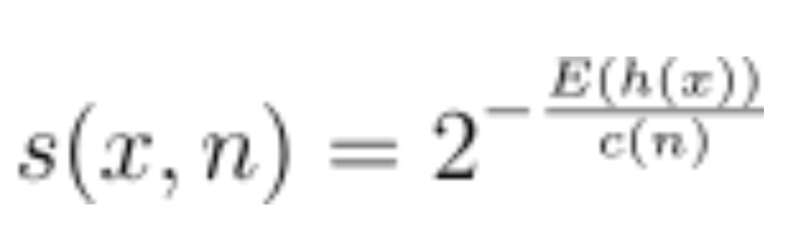

Donde:

- s(x,n): Esta es la puntuación de anomalía para una muestra x dada, donde n es el número de muestras en el conjunto de entrenamiento. La puntuación está en el rango de 0 a 1, donde valores más cercanos a 1 indican una mayor probabilidad de ser una anomalía.
- E(h(x)): Representa la longitud del camino promedio de la muestra x a través de todos los árboles en el bosque. En el contexto del Isolation Forest, el "camino" se refiere al número de divisiones necesarias para aislar completamente la muestra x. Para las anomalías, que son más fáciles de aislar, se espera que este número sea menor en comparación con los puntos normales.
- c(n): Es el factor de normalización, que se calcula como la longitud del camino promedio en un Árbol Binario de Búsqueda (BST) equilibrado con n nodos. Sirve para normalizar la longitud del camino promedio E(h(x)) de manera que la puntuación de anomalía sea independiente del número de muestras en el conjunto de entrenamiento. La fórmula para c(n) es algo compleja y se relaciona con las propiedades esperadas de los caminos en los árboles binarios.
- La puntuación de anomalía se calcula como el negativo de la potencia de 2 elevada al resultado de la longitud del camino promedio E(h(x)) dividido por el factor de normalización c(n). Esta formulación asegura que las muestras que tienen caminos más cortos (y, por lo tanto, son más fáciles de aislar) reciban puntuaciones de anomalía más altas.

Ya que tenemos las bases teóricas, vamos a la práctica:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


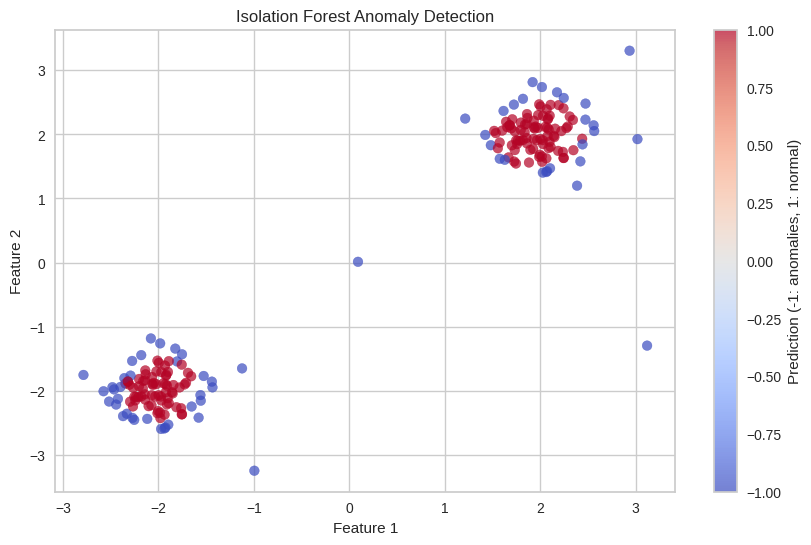

In [ ]:
from sklearn.ensemble import IsolationForest
import numpy as np
import matplotlib.pyplot as plt

# Generación de datos: 100 puntos normales y 10 anomalías
rng = np.random.RandomState(42)
X_normal = 0.3 * rng.randn(100, 2)
X_anomalies = rng.uniform(low=-4, high=4, size=(10, 2))
X = np.r_[X_normal + 2, X_normal - 2, X_anomalies]

# Creación del modelo Isolation Forest
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(X)

# Predicciones (-1 para anomalías, 1 para normales)
y_pred = clf.predict(X)

# Visualización de los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='coolwarm', alpha=0.7)
plt.title('Isolation Forest Anomaly Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Prediction (-1: anomalies, 1: normal)')
plt.show()

- La mayoría de los puntos normales están agrupados alrededor de los centros (2, 2) y (-2, -2) coloreados mayoritariamente con el color que indica puntos normales.
- Los puntos anómalos, que fueron generados para estar dispersos en un rango más amplio, probablemente estarán más aislados y coloreados con el color que indica anomalías.
- Esta visualización ayuda a entender cómo Isolation Forest puede identificar efectivamente anomalías en el conjunto de datos basándose en cuán alejados están los puntos.

Ahora hablemos de las ventajas y desventajas de este modelo:

**Ventajas:**
- Eficiencia: Funciona bien con grandes conjuntos de datos y es eficiente en términos de tiempo de ejecución y uso de memoria.
- No requiere etiquetado: Como método no supervisado, no necesita etiquetas de datos para entrenar.
- Flexibilidad: Efectivo tanto para detección de anomalías puntuales como contextuales.

**Desventajas:**
- Selección de Parámetros: La elección de parámetros como max_samples y contamination puede ser no trivial y afectar significativamente el rendimiento.
- Sensibilidad a la Configuración: Puede ser sensible a la configuración del modelo y requerir ajustes finos para optimizar el rendimiento.

Isolation Forest es una herramienta poderosa y eficiente para la detección de anomalías en conjuntos de datos complejos. Su enfoque único para aislar observaciones lo hace particularmente efectivo para identificar puntos de datos que son sustancialmente diferentes de la mayoría. Sin embargo, como con cualquier algoritmo, la comprensión y la cuidadosa selección de sus parámetros es clave para lograr un rendimiento óptimo en aplicaciones del mundo real.

Y para concluir esta unidad (más larga de lo normal porque el tema lo amerita) veamos otro método de detección de anomalías



## 5.4.2 One-class SVM

One-Class SVM (Support Vector Machine) es una variante del SVM tradicional que se utiliza para la detección de anomalías, es decir, identificar patrones de datos que no se ajustan al comportamiento esperado. A diferencia de los SVM tradicionales, que se utilizan para clasificar datos en dos o más categorías, One-Class SVM se enfoca en identificar un límite que separa los datos normales (la "clase única") de las anomalías.

El objetivo de One-Class SVM es encontrar un hiperplano en un espacio de características transformado (a través de una función kernel) que separe mejor los datos "normales" del origen (en este espacio transformado), maximizando la distancia de este hiperplano al origen. Esto se logra resolviendo el siguiente problema de optimización:

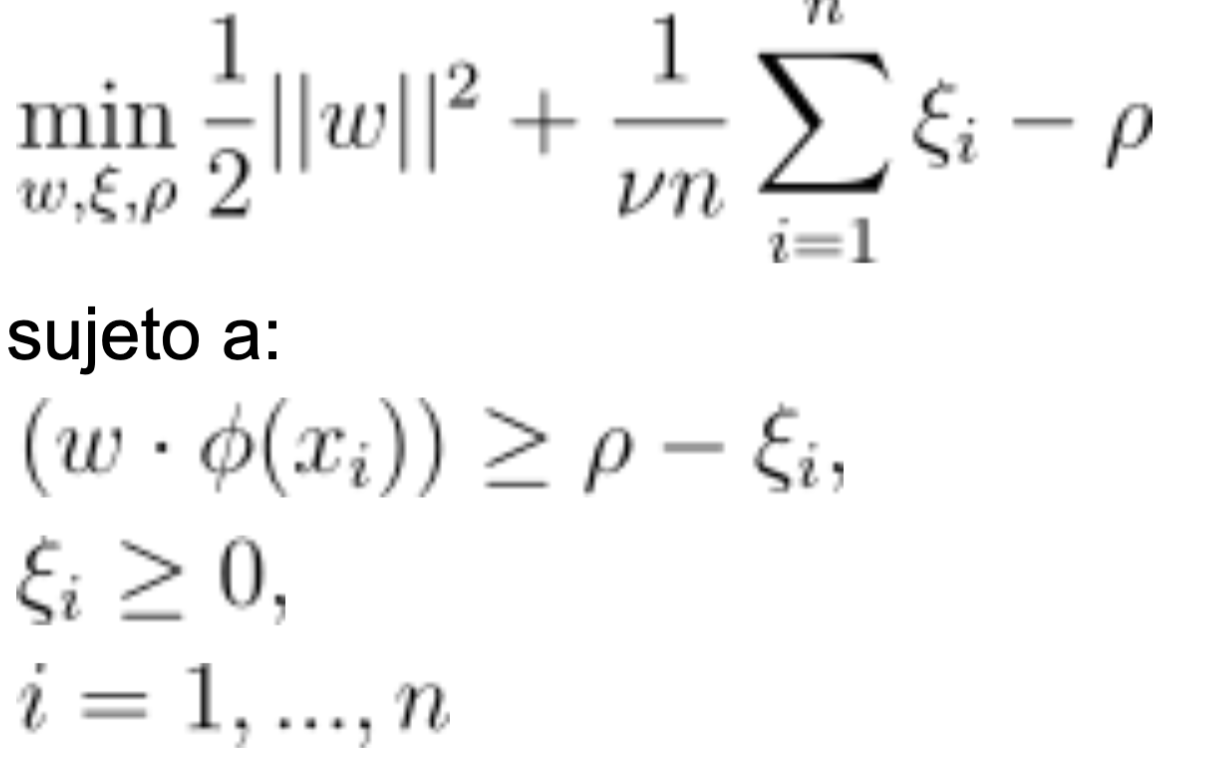

donde:

- w es el vector normal al hiperplano,
- ϕ(xi) es la función de mapeo al espacio de características,
- ξi son las variables de holgura que permiten outliers,
- ρ es el desplazamiento del hiperplano desde el origen en el espacio de características,
- ν (0 < ν < 1) es un parámetro que establece un límite superior en la fracción de outliers y un límite inferior en la fracción de vectores de soporte.

A continuación, veamos cómo implementar un One-Class SVM utilizando scikit-learn para la detección de anomalías:

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


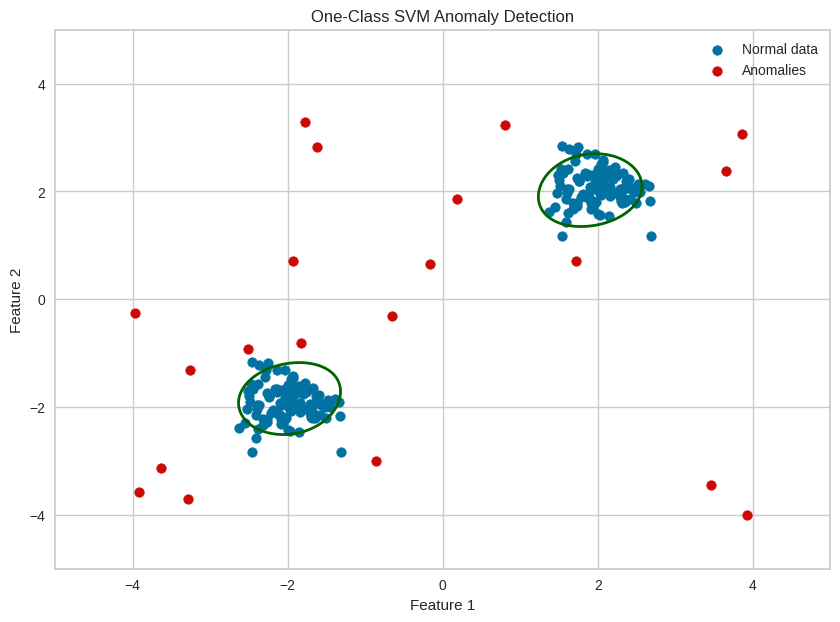

Número total de errores en data normal: 20
Número total de errores en outliers: 0
Número total de puntos en Normal Data: 200
Número total de outliers: 20


In [ ]:
from sklearn.svm import OneClassSVM
import numpy as np
import matplotlib.pyplot as plt

# Generar datos "normales"
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]

# Generar algunos datos "anómalos"
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# Crear y ajustar el modelo One-Class SVM
oc_svm = OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
oc_svm.fit(X_train)

# Detectar outliers y inliers (anomalías y normales)
y_pred_train = oc_svm.predict(X_train)
y_pred_outliers = oc_svm.predict(X_outliers)

# Visualización
plt.figure(figsize=(10, 7))

# Dibujar puntos normales
plt.scatter(X_train[:, 0], X_train[:, 1], c='b', label="Normal data")

# Dibujar anomalías
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='r', label="Anomalies")

# Dibujar la línea de decisión del modelo
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
Z = oc_svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkgreen')

plt.title("One-Class SVM Anomaly Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Calculando la proporción de inliers y outliers detectados
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

print(f"Número total de errores en data normal: {n_error_train}")
print(f"Número total de errores en outliers: {n_error_outliers}")
print(f"Número total de puntos en Normal Data: {X_train.shape[0]}")
print(f"Número total de outliers: {X_outliers.shape[0]}")


- Los puntos "normales" agrupados alrededor de los centros, encapsulados dentro del límite de decisión.
- Los puntos "anómalos" situados fuera de este límite, destacando su naturaleza atípica en comparación con los datos "normales".
- El contorno generado por decision_function muestra el límite de decisión, que idealmente encapsula la mayoría de los datos "normales" mientras excluye las anomalías.

- Número de Errores en Datos Normales: Cuántos puntos "normales" fueron incorrectamente etiquetados como anomalías por el modelo.
- Número de Errores en Anomalías: Cuántos puntos anómalos fueron incorrectamente etiquetados como normales.
- Estas métricas ofrecen una visión de la efectividad del modelo para aislar correctamente los datos anómalos de los normales.

Ahora repasemos las ventajas y desventajas de este modelo.

**Ventajas:**
- Efectivo en espacios de alta dimensión.
- No necesita datos de anomalías para el entrenamiento.
- Capaz de detectar anomalías complejas utilizando kernels.

**Desventajas:**
- La elección del kernel y sus parámetros puede ser complicada y no intuitiva.
- Sensible al parámetro ν, que controla el número de vectores de soporte y margen de error.
- Puede ser ineficiente en términos de tiempo de cómputo y uso de memoria con grandes conjuntos de datos.

One-Class SVM proporciona un enfoque poderoso y flexible para la detección de anomalías, especialmente útil en situaciones donde los datos "normales" son conocidos, pero las anomalías son desconocidas o difíciles de definir explícitamente.

Con esto POR FIN finalizamos nuestra unidad. Ahora veamos algo que suena muy apantallante. Algoritmos de aprendizaje por refuerzo.

